## Data Overview

The WiDS Datathon 2022 focuses on a prediction task involving roughly 100k observations of building energy usage records collected over 7 years and a number of states within the United States. The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. Your task is to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building.

You are provided with two datasets: (1) the training dataset where the observed values of the Site EUI for each row is provided and (2) the test dataset where we withhold the observed values of the Site EUI for each row. To participate in the Datathon, you will submit a solution file containing the predicted Site EUI values for each row in the test dataset. The predicted values you submit will be compared against the observed Site EUI values for the test dataset and this will determine your standing on the Leaderboard during the competition as well as your final standing when the competition closes.

You are also provided with an example of a solution file prepared for submission.

Note: During the competition the leaderboard is calculated with approximately 51% of the test data. After the competition closes, the final standings will be computed based on the other 49%. As such, the final leaderboard standings may be different than those during the competition.

External Data Usage
The datathon task can be tackled successfully without the use of external data. In fact, the degree to which we have anonymized the data would make joining additional data to the competition data difficult. However, participants who wish to do so may use additional external data for the purpose of building predictive models.

### Data Dictionary
Covariates
- id: building id

- Year_Factor: anonymized year in which the weather and energy usage factors were observed

- State_Factor: anonymized state in which the building is located

- building_class: building classification

- facility_type: building usage type

- floor_area: floor area (in square feet) of the building

- year_built: year in which the building was constructed

- energy_star_rating: the energy star rating of the building

- ELEVATION: elevation of the building location

- january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building

- january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building

- january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building

- cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

- heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

- precipitation_inches: annual precipitation in inches at the location of the building

- snowfall_inches: annual snowfall in inches at the location of the building

- snowdepth_inches: annual snow depth in inches at the location of the building

- avg_temp: average temperature over a year at the location of the building

- days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building

- days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building

- days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building

- days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building

- days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building

- days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building

- days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building

- days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building

- direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

- direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

- max_wind_speed: maximum wind speed at the location of the building

- days_with_fog: number of days with fog at the location of the building

Target
- site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [2]:
Train_data = pd.read_csv("WIDS_train.csv")
Test_data  =  pd.read_csv("WIDS_test.csv")

In [3]:
# let's create a copy of the data to avoid any changes to original data
df1 = Train_data.copy()
df2 = Test_data.copy()

In [4]:
# let's create a copy of the data to avoid any changes to original data
dftrain = Train_data.copy()
dftest = Test_data.copy()

In [5]:
Train_data.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

In [6]:
Test_data.head()

Year_Factor State_Factor building_class                 facility_type  \
0            7      State_1     Commercial  Grocery_store_or_food_market   
1            7      State_1     Commercial  Grocery_store_or_food_market   
2            7      State_1     Commercial  Grocery_store_or_food_market   
3            7      State_1     Commercial  Grocery_store_or_food_market   
4            7      State_1     Commercial  Grocery_store_or_food_market   

   floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0     28484.0      1994.0                37.0        2.4                38   
1     21906.0      1961.0                55.0       45.7                38   
2     16138.0      1950.0                 1.0       59.1                38   
3     97422.0      1971.0                34.0       35.4                38   
4     61242.0      1942.0                35.0        1.8                38   

   january_avg_temp  ...  days_below_0F  days_above_80F  days_above_90F  \
0         50.596774  ...              0              29               5   
1         50.596774  ...              0              29               5   
2         50.596774  ...              0              29               5   
3         50.596774  ...              0              29               5   
4         50.596774  ...              0              29               5   

   days_above_100F  days_above_110F  direction_max_wind_speed  \
0                2                0                       NaN   
1                2                0                       NaN   
2                2                0                       NaN   
3                2                0                       NaN   
4                2                0                     340.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog     id  
0                        NaN             NaN            NaN  75757  
1                        NaN             NaN            NaN  75758  
2                        NaN             NaN            NaN  75759  
3                        NaN             NaN            NaN  75760  
4                      330.0            22.8          126.0  75761  

[5 rows x 63 columns]

In [7]:
Train_data.shape

(75757, 64)

*Observation*

- There are 75757 rows and 64 columns

In [8]:
Test_data.shape

(9705, 63)

*Observation*

- There are 9705 rows and 63 columns in the test data

In [10]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

*Observation*
- The datatypes are of Objects, integers and floats
-  There are missing values

In [4]:
cat_vars = ["State_Factor", "building_class", "facility_type"]


for colname in cat_vars:
    df1[colname] = df1[colname].astype("category")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year_Factor                75757 non-null  int64   
 1   State_Factor               75757 non-null  category
 2   building_class             75757 non-null  category
 3   facility_type              75757 non-null  category
 4   floor_area                 75757 non-null  float64 
 5   year_built                 73920 non-null  float64 
 6   energy_star_rating         49048 non-null  float64 
 7   ELEVATION                  75757 non-null  float64 
 8   january_min_temp           75757 non-null  int64   
 9   january_avg_temp           75757 non-null  float64 
 10  january_max_temp           75757 non-null  int64   
 11  february_min_temp          75757 non-null  int64   
 12  february_avg_temp          75757 non-null  float64 
 13  february_max_temp          7575

*Observation*
- Object datatype have been converted to categorical variables

In [16]:
# checking missing values
Train_data.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

*Observation*

- 6 columns have missing values viz: 
    * direction_max_wind_speed
    * direction_peak_wind_speed
    * max_wind_speed
    * days_with_fog
    * energy_star_rating
    * year built

In [19]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [18]:
# checking missing values
Test_data.isna().sum()

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64

*Observation*

- 6 columns have missing values viz: 
    * direction_max_wind_speed
    * direction_peak_wind_speed
    * max_wind_speed
    * days_with_fog
    * energy_star_rating
    * year built

In [14]:
# let's check for duplicate observations
Train_data.duplicated().sum()

0

*Observation*
- There are no duplicates

In [11]:
# Statistical summary of the data

Train_data.describe(include="all").T

count unique                        top   freq  \
Year_Factor                75757.0    NaN                        NaN    NaN   
State_Factor                 75757      7                    State_6  50840   
building_class               75757      2                Residential  43558   
facility_type                75757     60  Multifamily_Uncategorized  39455   
floor_area                 75757.0    NaN                        NaN    NaN   
...                            ...    ...                        ...    ...   
direction_peak_wind_speed  33946.0    NaN                        NaN    NaN   
max_wind_speed             34675.0    NaN                        NaN    NaN   
days_with_fog              29961.0    NaN                        NaN    NaN   
site_eui                   75757.0    NaN                        NaN    NaN   
id                         75757.0    NaN                        NaN    NaN   

                                    mean           std       min        25%  \
Year_Factor                     4.367755      1.471441       1.0        3.0   
State_Factor                         NaN           NaN       NaN        NaN   
building_class                       NaN           NaN       NaN        NaN   
facility_type                        NaN           NaN       NaN        NaN   
floor_area                 165983.865858  246875.79094     943.0    62379.0   
...                                  ...           ...       ...        ...   
direction_peak_wind_speed      62.779974    130.308106       1.0        1.0   
max_wind_speed                  4.190601      6.458789       1.0        1.0   
days_with_fog                 109.142051     50.699751      12.0       88.0   
site_eui                       82.584693     58.255403  1.001169  54.528601   
id                               37878.0  21869.306509       0.0    18939.0   

                                 50%        75%        max  
Year_Factor                      5.0        6.0        6.0  
State_Factor                     NaN        NaN        NaN  
building_class                   NaN        NaN        NaN  
facility_type                    NaN        NaN        NaN  
floor_area                   91367.0   166000.0  6385382.0  
...                              ...        ...        ...  
direction_peak_wind_speed        1.0        1.0      360.0  
max_wind_speed                   1.0        1.0       23.3  
days_with_fog                  104.0      131.0      311.0  
site_eui                   75.293716  97.277534  997.86612  
id                           37878.0    56817.0    75756.0  

[64 rows x 11 columns]

In [ ]:
*Observation*


In [5]:
# Let's treat missing values

medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
df1[numeric_columns] = df1[numeric_columns].apply(medianFiller, axis=0)

In [6]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()
df2[numeric_columns] = df2[numeric_columns].apply(medianFiller, axis=0)

In [7]:
# checking the number of missing values
df1.isnull().sum()

Year_Factor                  0
State_Factor                 0
building_class               0
facility_type                0
floor_area                   0
                            ..
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
site_eui                     0
id                           0
Length: 64, dtype: int64

In [23]:
# checking the number of missing values
df2.isnull().sum()

Year_Factor                  0
State_Factor                 0
building_class               0
facility_type                0
floor_area                   0
                            ..
direction_max_wind_speed     0
direction_peak_wind_speed    0
max_wind_speed               0
days_with_fog                0
id                           0
Length: 63, dtype: int64

*Observation*

- All missing values treated.

In [24]:
# Statistical summary of the data

df1.describe(include="all").T

count unique                        top   freq  \
Year_Factor                75757.0    NaN                        NaN    NaN   
State_Factor                 75757      7                    State_6  50840   
building_class               75757      2                Residential  43558   
facility_type                75757     60  Multifamily_Uncategorized  39455   
floor_area                 75757.0    NaN                        NaN    NaN   
...                            ...    ...                        ...    ...   
direction_peak_wind_speed  75757.0    NaN                        NaN    NaN   
max_wind_speed             75757.0    NaN                        NaN    NaN   
days_with_fog              75757.0    NaN                        NaN    NaN   
site_eui                   75757.0    NaN                        NaN    NaN   
id                         75757.0    NaN                        NaN    NaN   

                                    mean           std       min        25%  \
Year_Factor                     4.367755      1.471441       1.0        3.0   
State_Factor                         NaN           NaN       NaN        NaN   
building_class                       NaN           NaN       NaN        NaN   
facility_type                        NaN           NaN       NaN        NaN   
floor_area                 165983.865858  246875.79094     943.0    62379.0   
...                                  ...           ...       ...        ...   
direction_peak_wind_speed      28.683026     92.479537       1.0        1.0   
max_wind_speed                  2.460381      4.649782       1.0        1.0   
days_with_fog                 106.033621     31.982643      12.0      104.0   
site_eui                       82.584693     58.255403  1.001169  54.528601   
id                               37878.0  21869.306509       0.0    18939.0   

                                 50%        75%        max  
Year_Factor                      5.0        6.0        6.0  
State_Factor                     NaN        NaN        NaN  
building_class                   NaN        NaN        NaN  
facility_type                    NaN        NaN        NaN  
floor_area                   91367.0   166000.0  6385382.0  
...                              ...        ...        ...  
direction_peak_wind_speed        1.0        1.0      360.0  
max_wind_speed                   1.0        1.0       23.3  
days_with_fog                  104.0      104.0      311.0  
site_eui                   75.293716  97.277534  997.86612  
id                           37878.0    56817.0    75756.0  

[64 rows x 11 columns]

*Observation*
- The minimum floor area is 943
- The maximum floor area is 6385382.0

## EDA

In [5]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

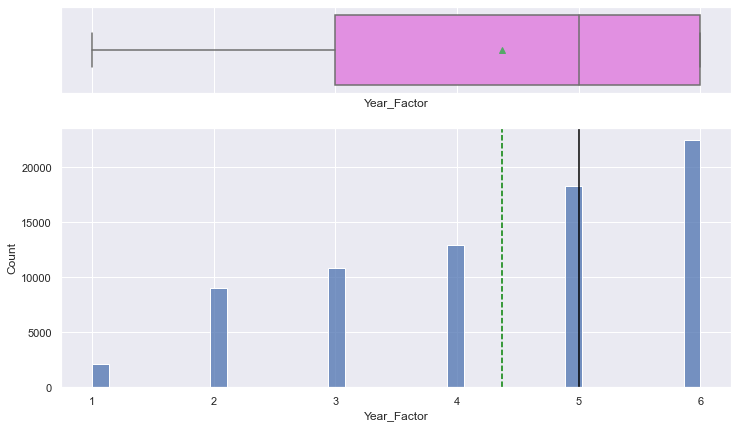

In [26]:
histogram_boxplot(df1, "Year_Factor")

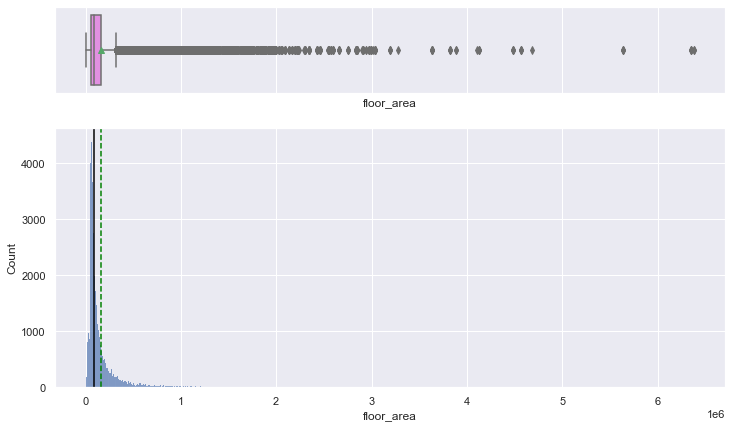

In [10]:
histogram_boxplot(df1, "floor_area")

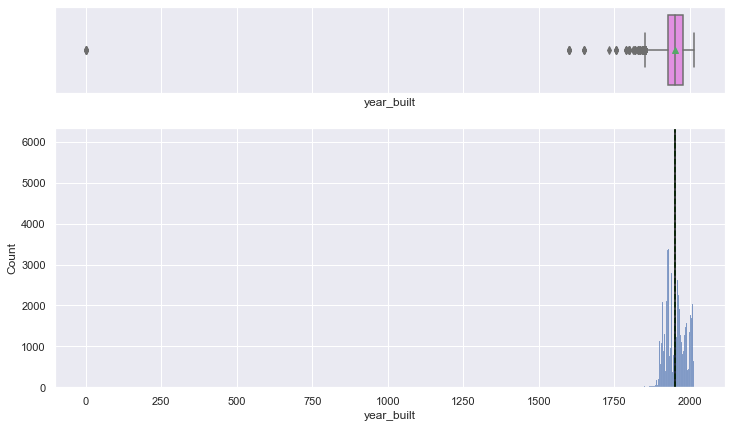

In [11]:
histogram_boxplot(df1, "year_built")

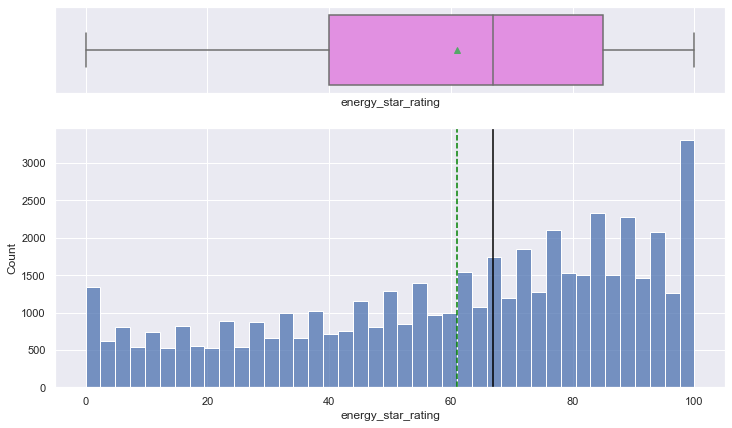

In [12]:
histogram_boxplot(df1, "energy_star_rating")

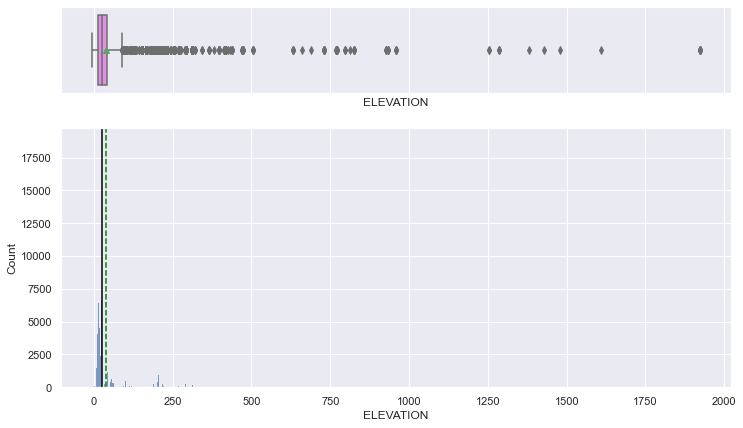

In [13]:
histogram_boxplot(df1, "ELEVATION")

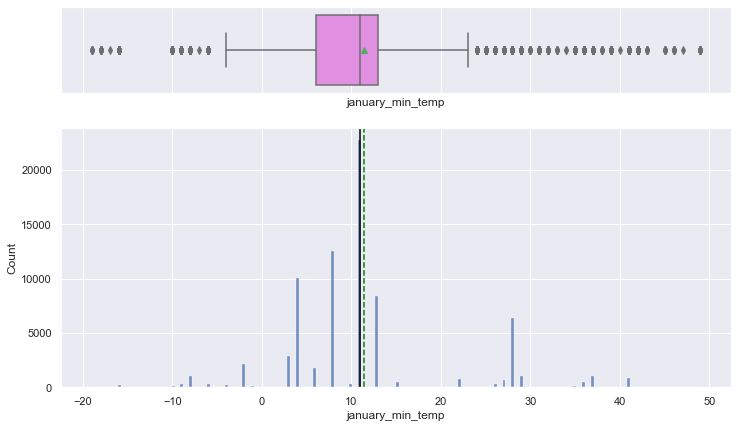

In [14]:
histogram_boxplot(df1, "january_min_temp")

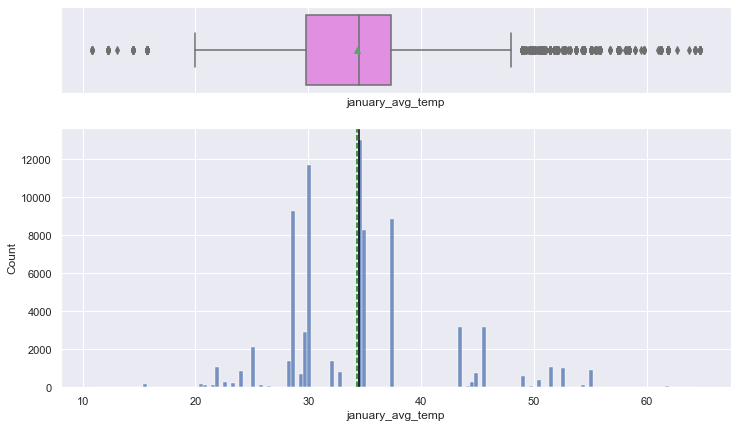

In [15]:
histogram_boxplot(df1, "january_avg_temp")

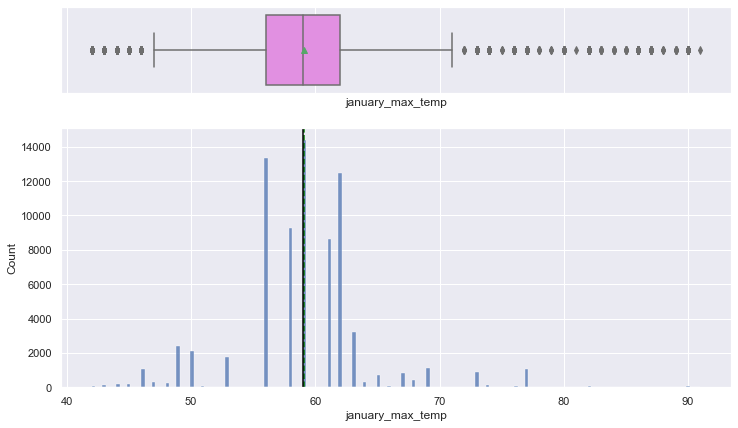

In [16]:
histogram_boxplot(df1, "january_max_temp")

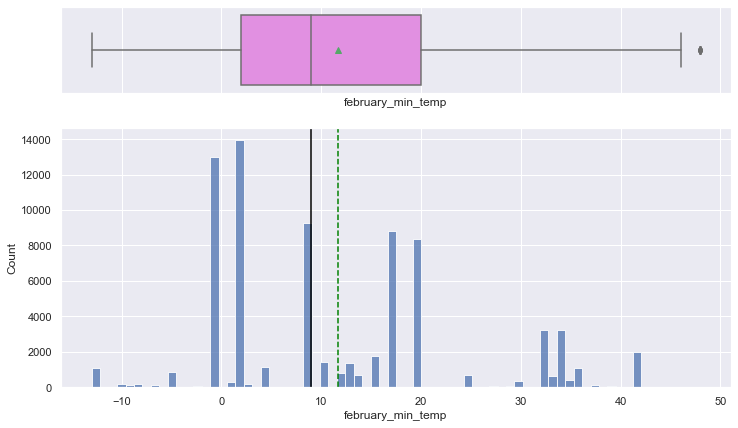

In [17]:
histogram_boxplot(df1, "february_min_temp")

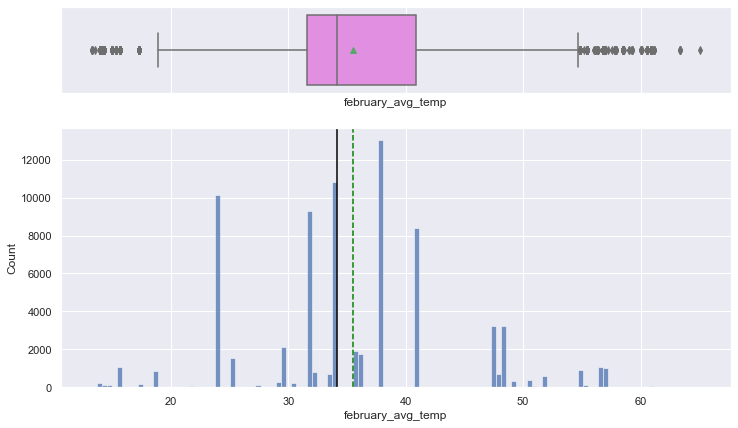

In [18]:
histogram_boxplot(df1, "february_avg_temp")

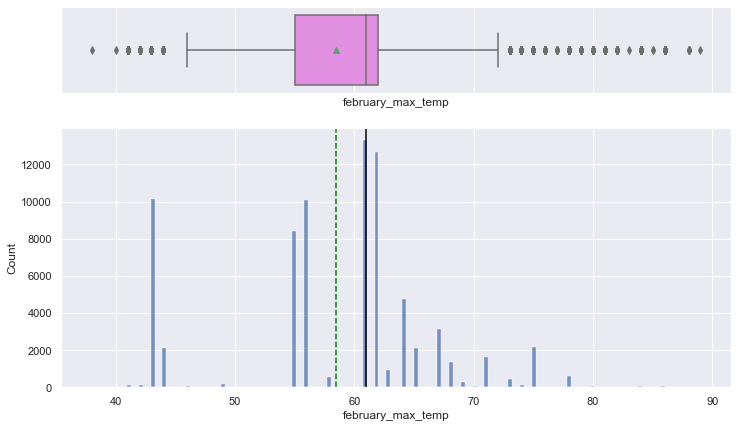

In [19]:
histogram_boxplot(df1, "february_max_temp")

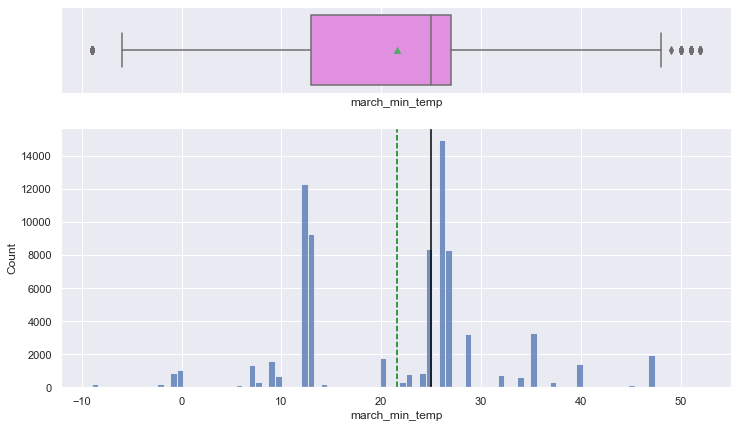

In [20]:
histogram_boxplot(df1, "march_min_temp")

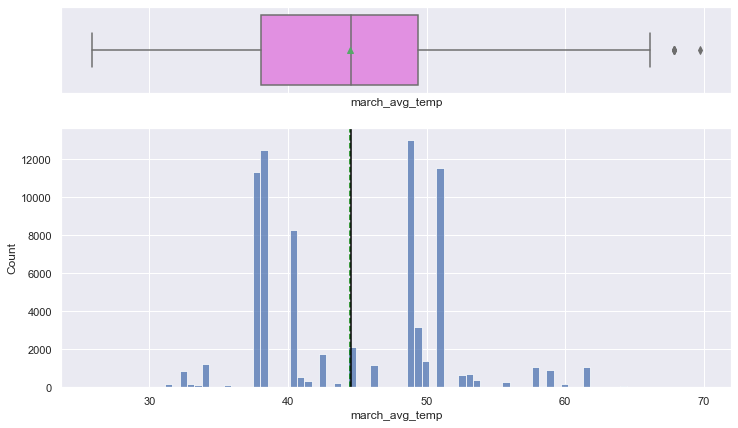

In [21]:
histogram_boxplot(df1, "march_avg_temp")

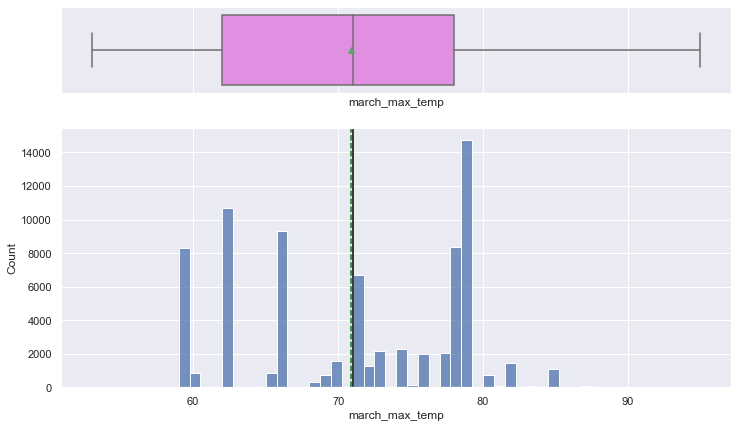

In [22]:
histogram_boxplot(df1, "march_max_temp")

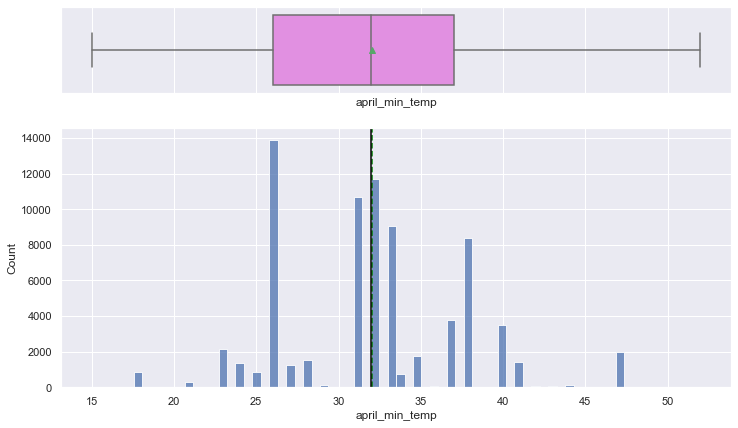

In [23]:
histogram_boxplot(df1, "april_min_temp")

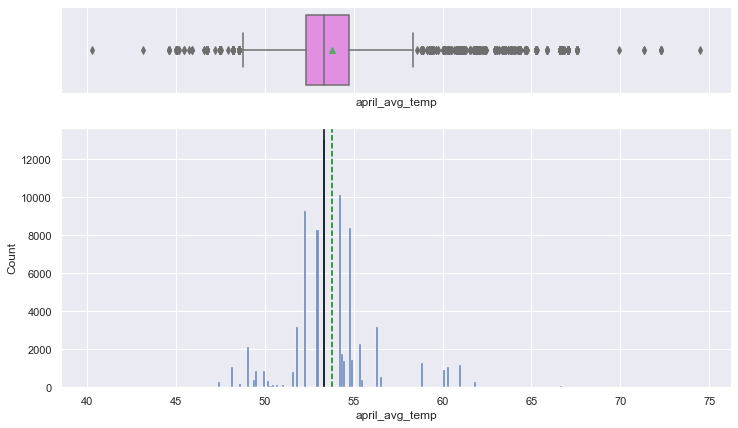

In [24]:
histogram_boxplot(df1, "april_avg_temp")

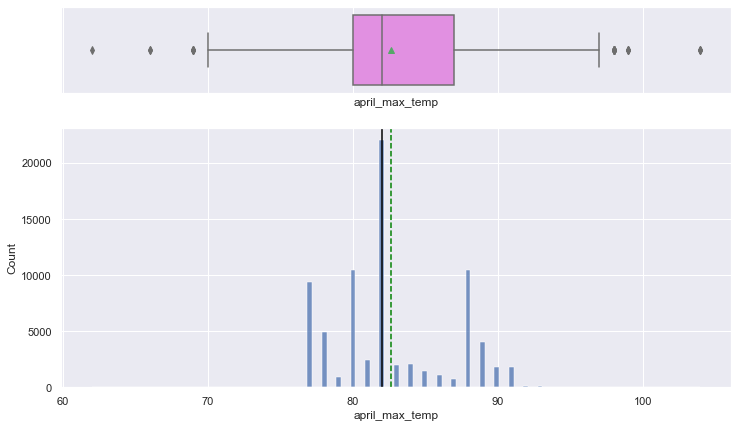

In [25]:
histogram_boxplot(df1, "april_max_temp")

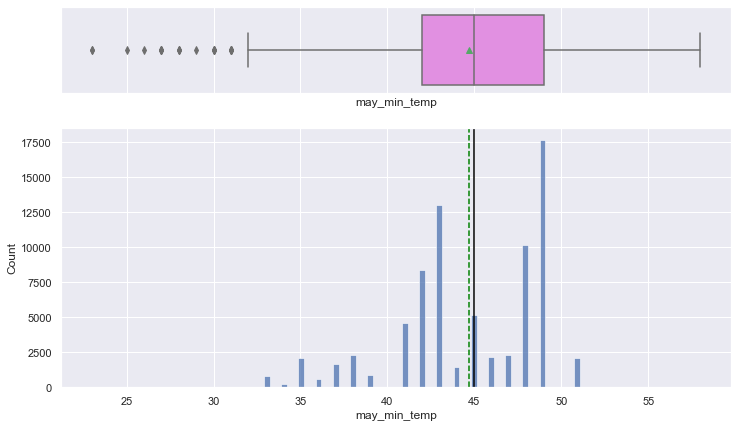

In [26]:
histogram_boxplot(df1, "may_min_temp")

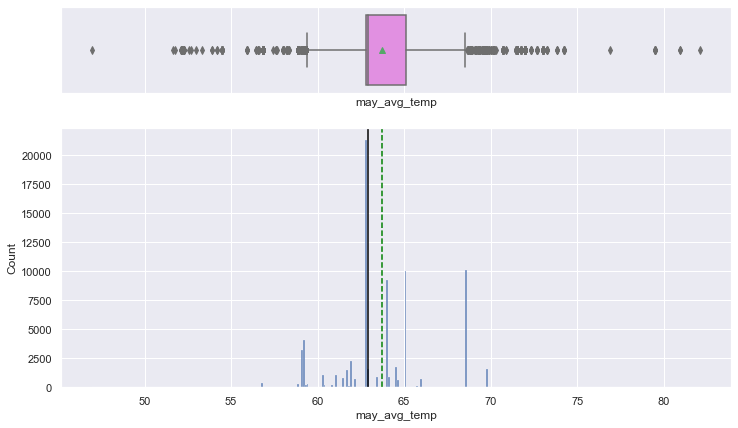

In [27]:
histogram_boxplot(df1, "may_avg_temp")

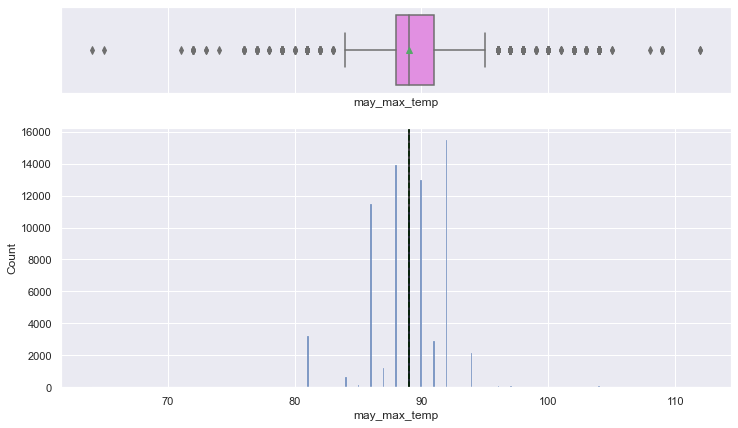

In [28]:
histogram_boxplot(df1, "may_max_temp")

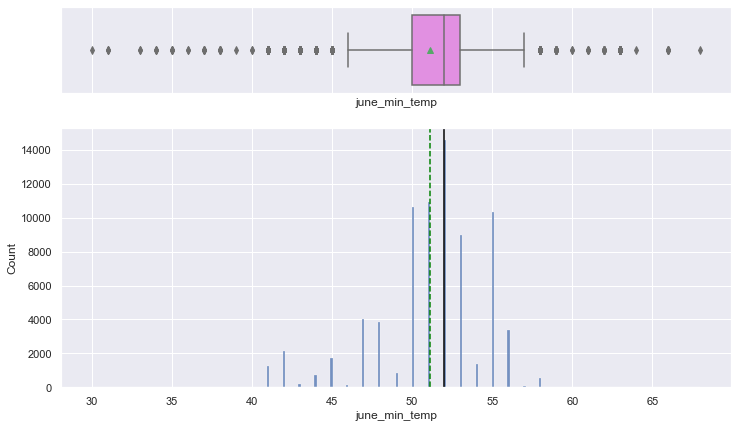

In [29]:
histogram_boxplot(df1, "june_min_temp")

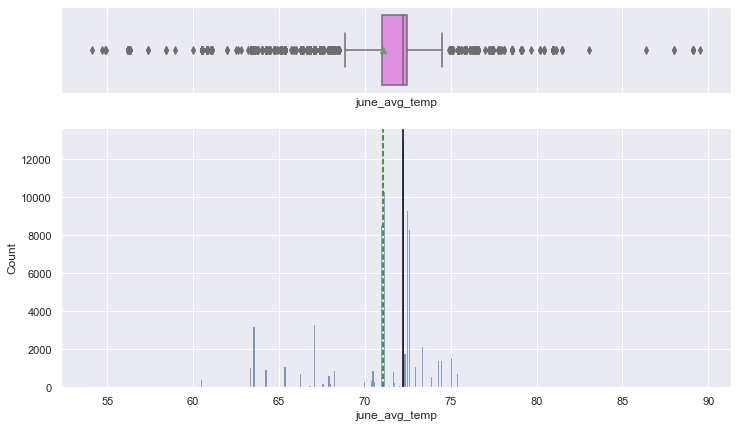

In [30]:
histogram_boxplot(df1, "june_avg_temp")

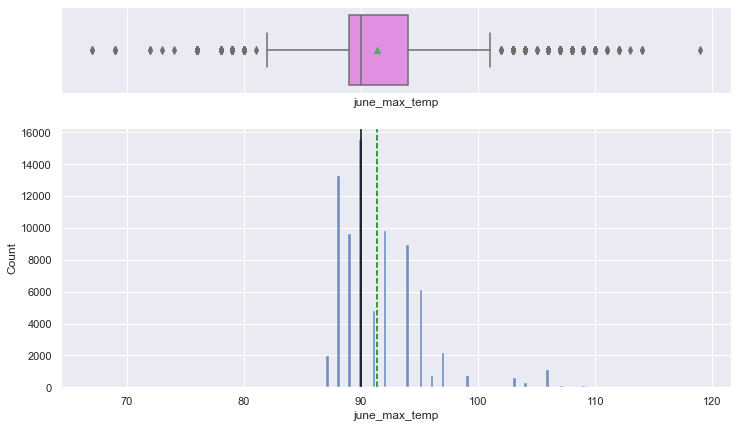

In [31]:
histogram_boxplot(df1, "june_max_temp")

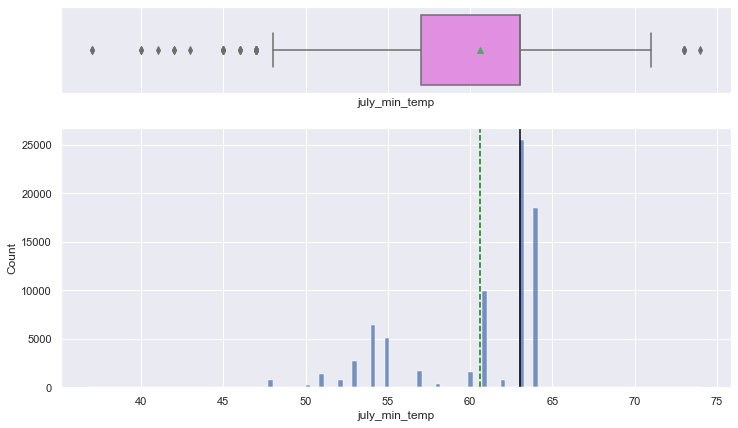

In [32]:
histogram_boxplot(df1, "july_min_temp")

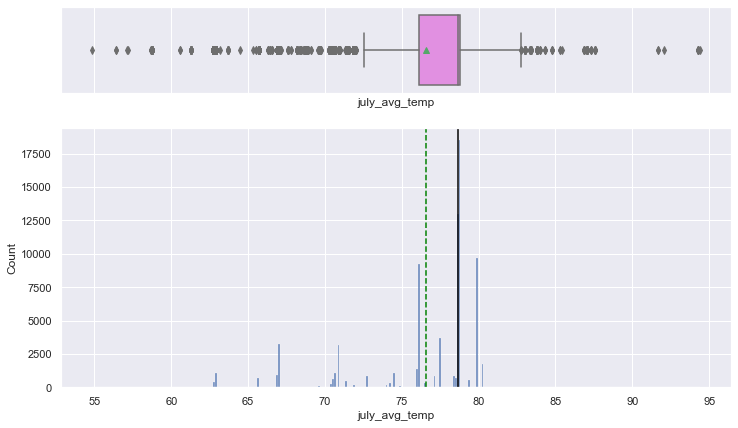

In [33]:
histogram_boxplot(df1, "july_avg_temp")

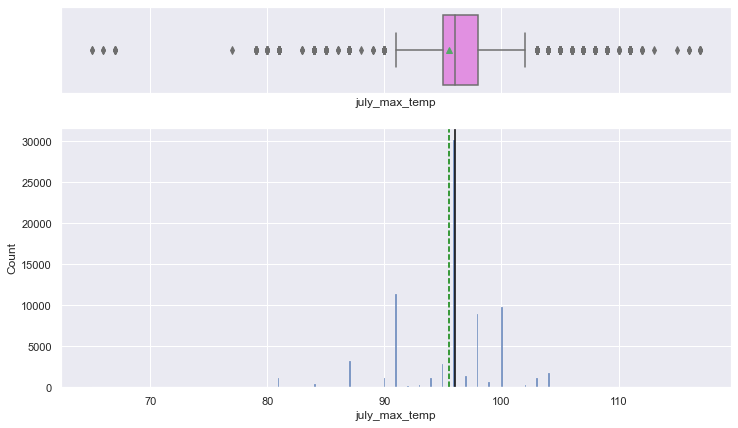

In [34]:
histogram_boxplot(df1, "july_max_temp")

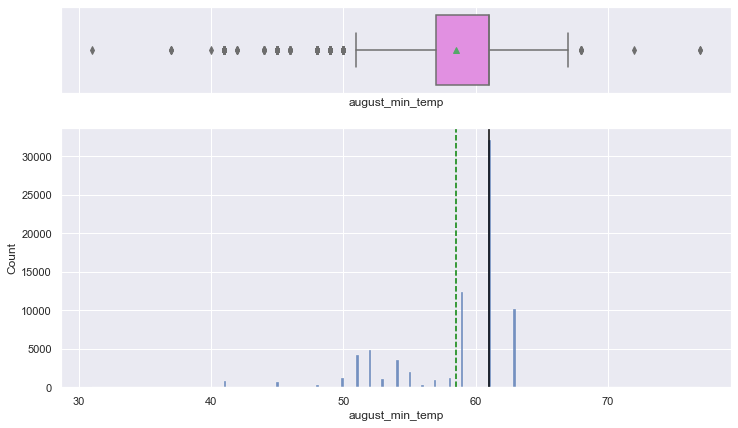

In [35]:
histogram_boxplot(df1, "august_min_temp")

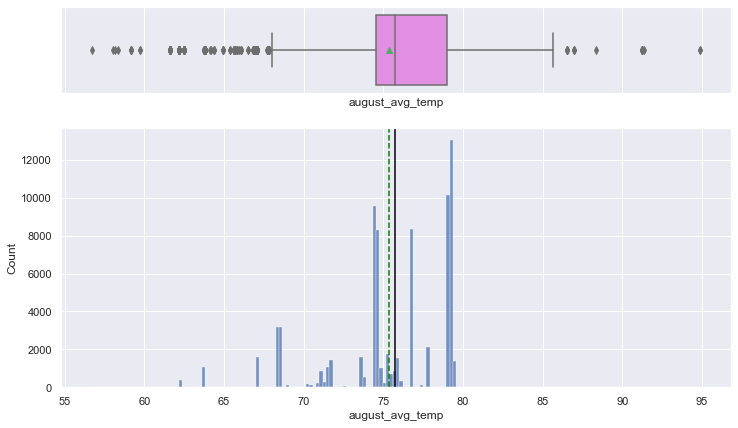

In [36]:
histogram_boxplot(df1, "august_avg_temp")

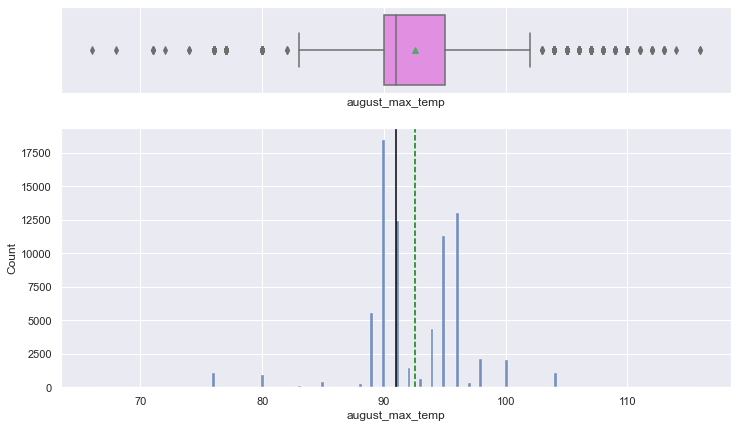

In [37]:
histogram_boxplot(df1, "august_max_temp")

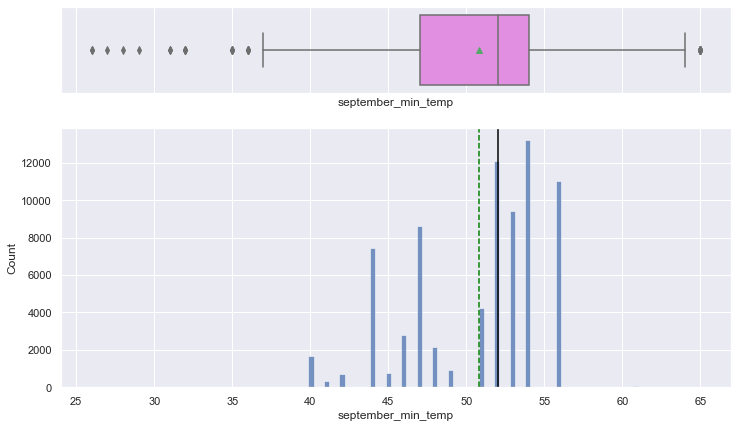

In [38]:
histogram_boxplot(df1, "september_min_temp")

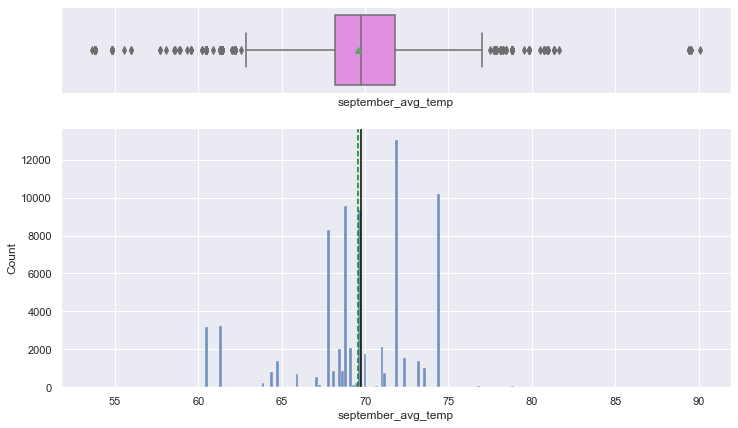

In [39]:
histogram_boxplot(df1, "september_avg_temp")

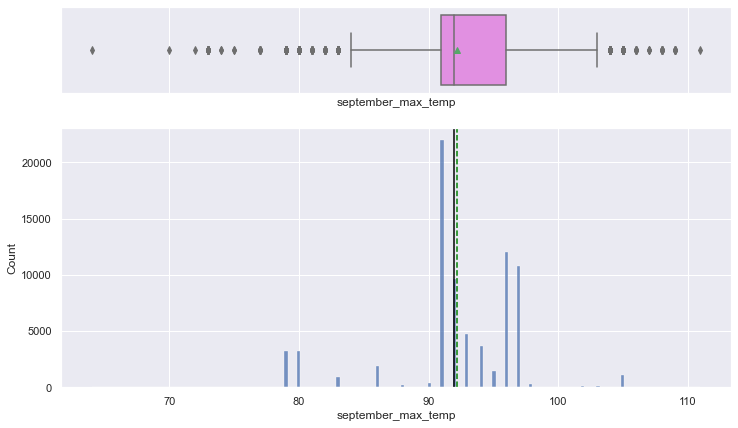

In [40]:
histogram_boxplot(df1, "september_max_temp")

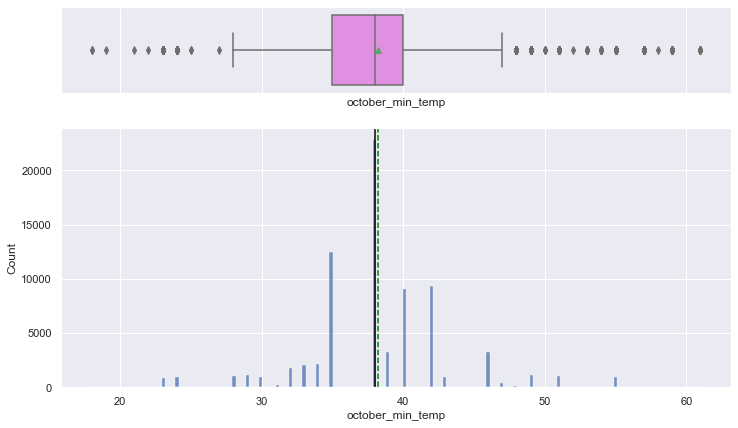

In [41]:
histogram_boxplot(df1, "october_min_temp")

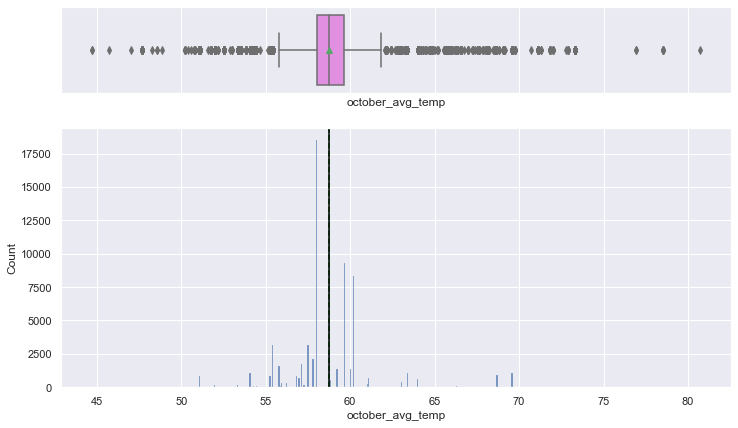

In [42]:
histogram_boxplot(df1, "october_avg_temp")

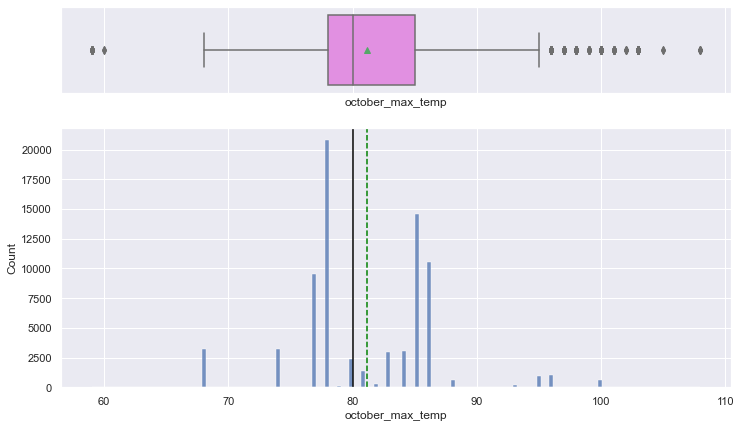

In [43]:
histogram_boxplot(df1, "october_max_temp")

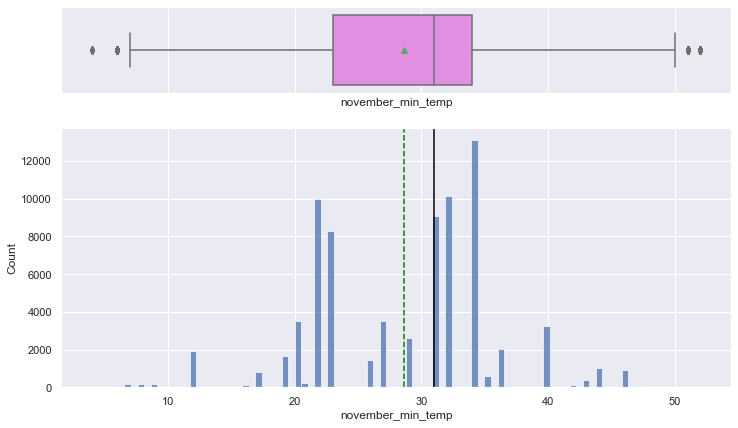

In [44]:
histogram_boxplot(df1, "november_min_temp")

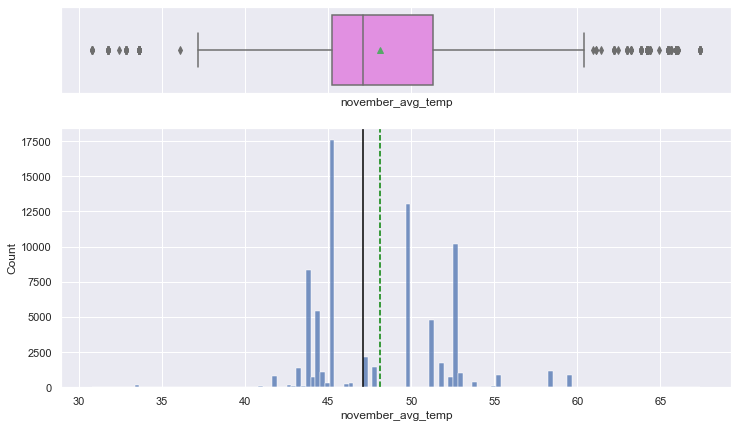

In [45]:
histogram_boxplot(df1, "november_avg_temp")

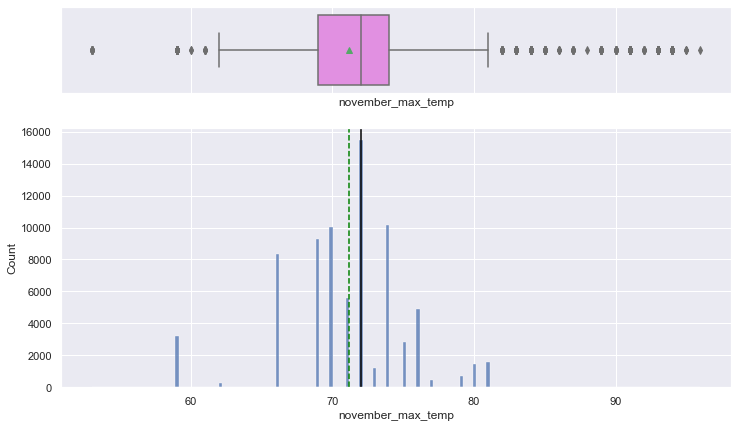

In [46]:
histogram_boxplot(df1, "november_max_temp")

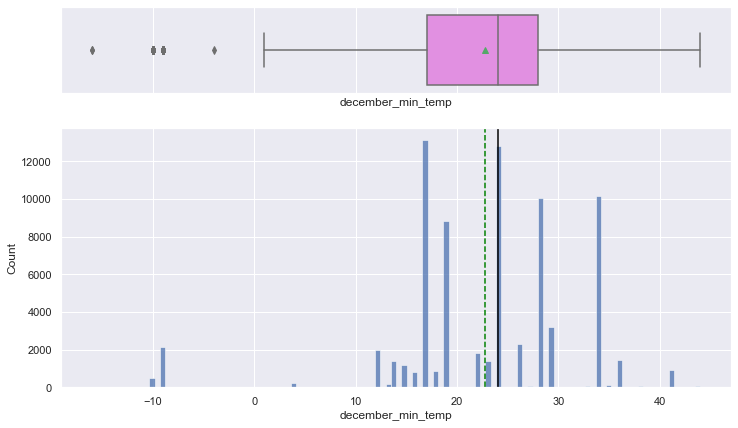

In [47]:
histogram_boxplot(df1, "december_min_temp")

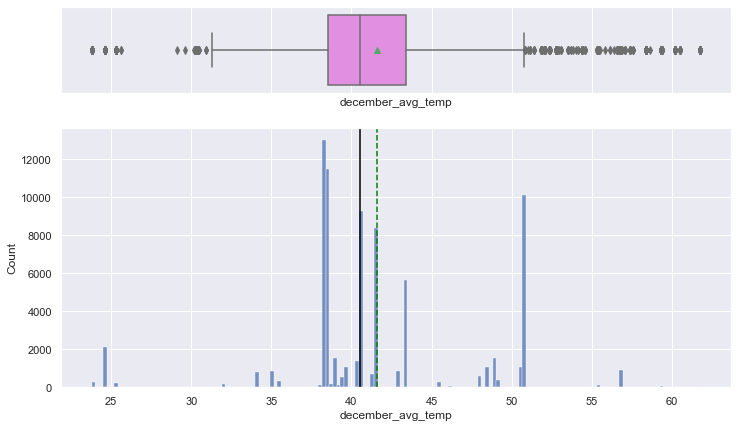

In [48]:
histogram_boxplot(df1, "december_avg_temp")

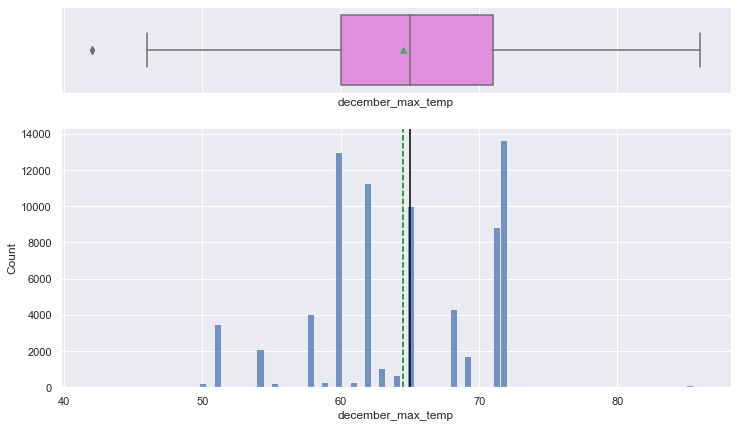

In [49]:
histogram_boxplot(df1, "december_max_temp")

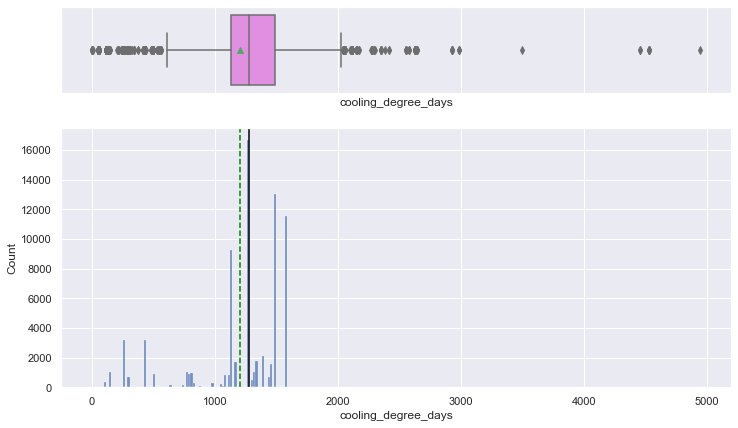

In [50]:
histogram_boxplot(df1, "cooling_degree_days")

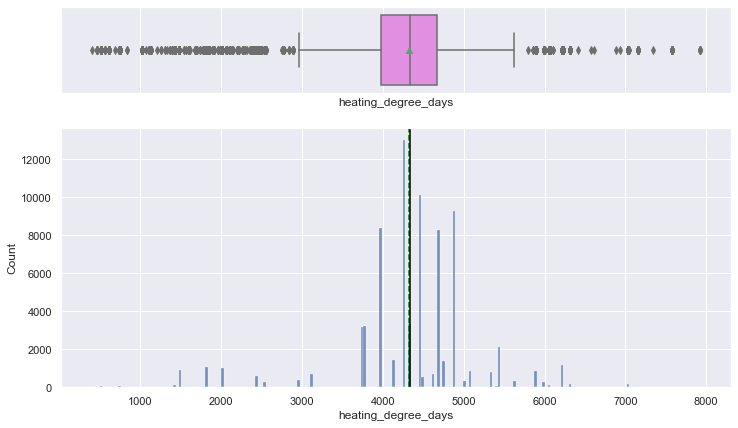

In [51]:
histogram_boxplot(df1, "heating_degree_days")

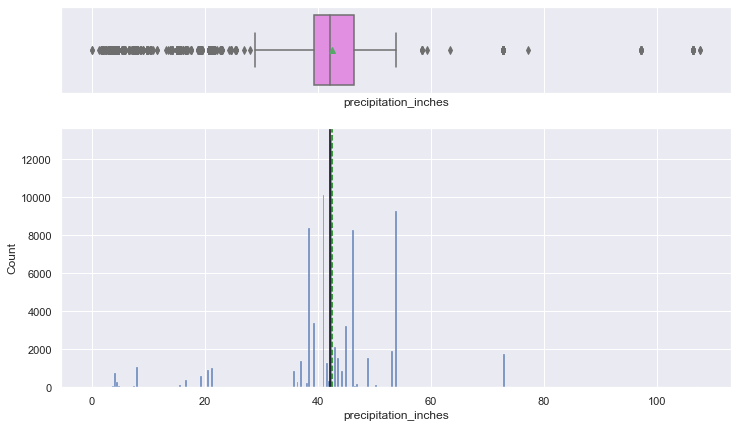

In [52]:
histogram_boxplot(df1, "precipitation_inches")

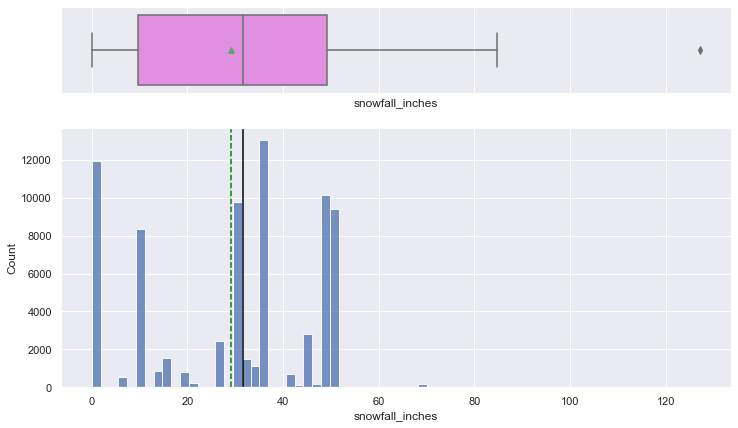

In [53]:
histogram_boxplot(df1, "snowfall_inches")

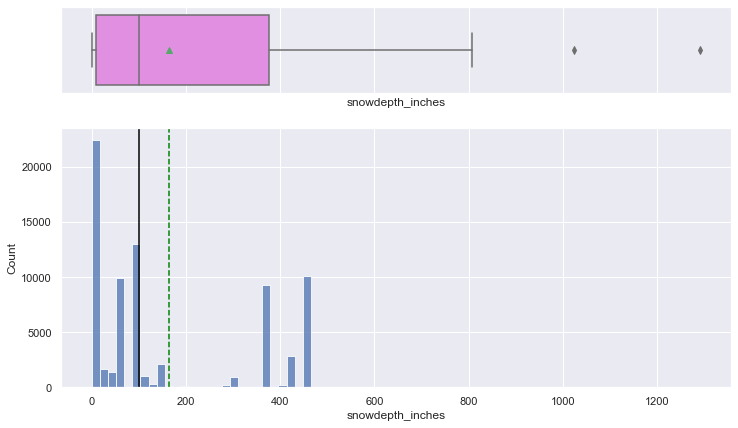

In [54]:
histogram_boxplot(df1, "snowdepth_inches")

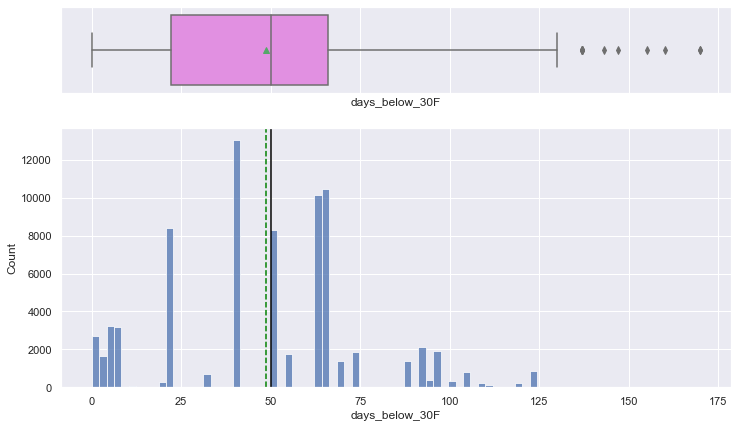

In [55]:
histogram_boxplot(df1, "days_below_30F")

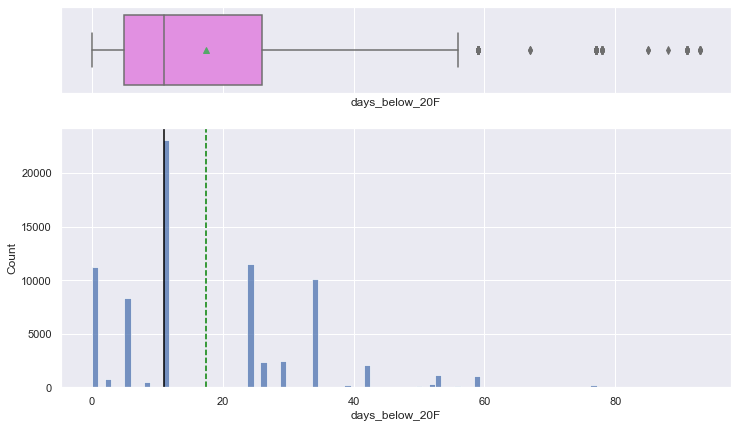

In [56]:
histogram_boxplot(df1, "days_below_20F")

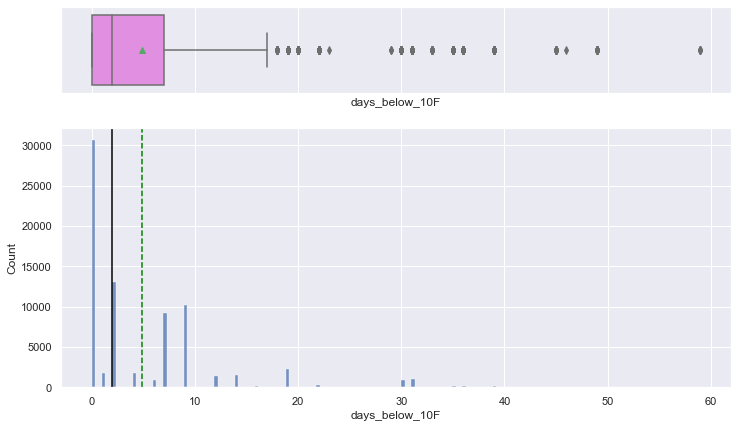

In [57]:
histogram_boxplot(df1, "days_below_10F")

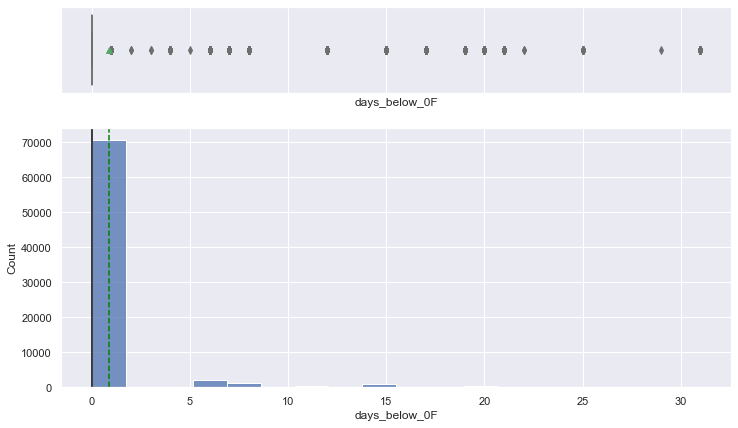

In [58]:
histogram_boxplot(df1, "days_below_0F")

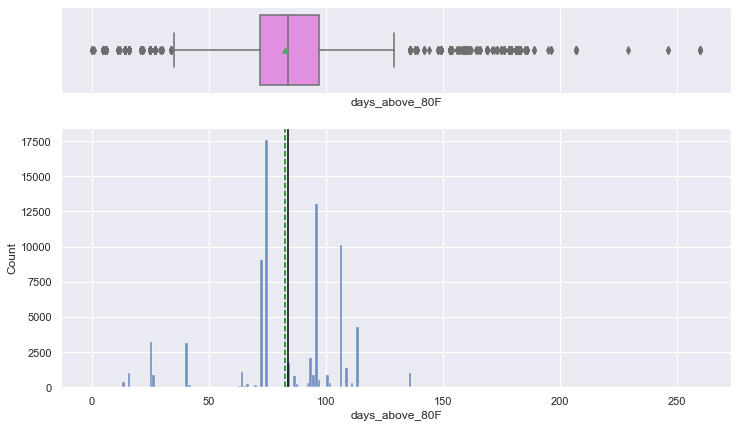

In [62]:
histogram_boxplot(df1, "days_above_80F")

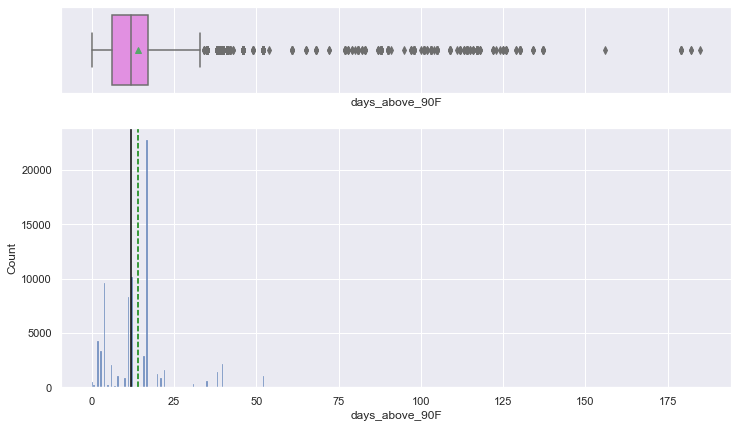

In [63]:
histogram_boxplot(df1, "days_above_90F")

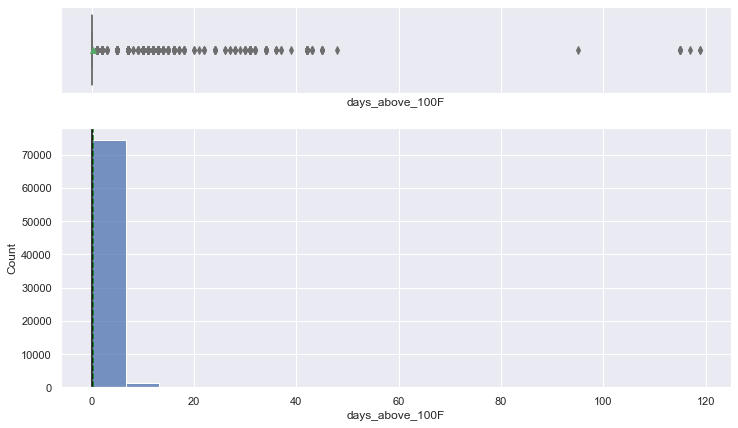

In [64]:
histogram_boxplot(df1, "days_above_100F")

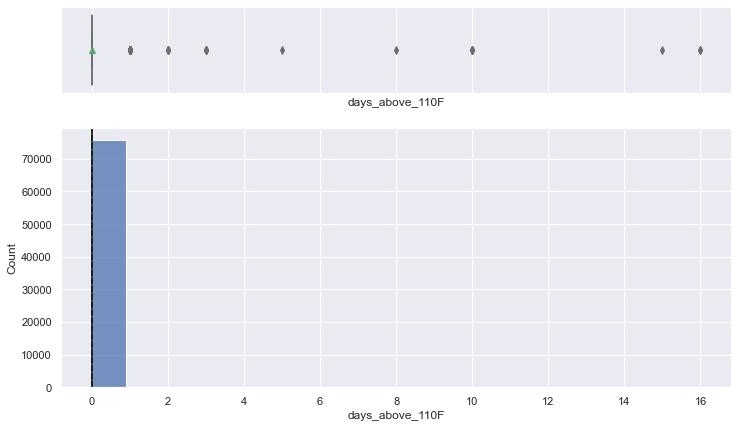

In [65]:
histogram_boxplot(df1, "days_above_110F")

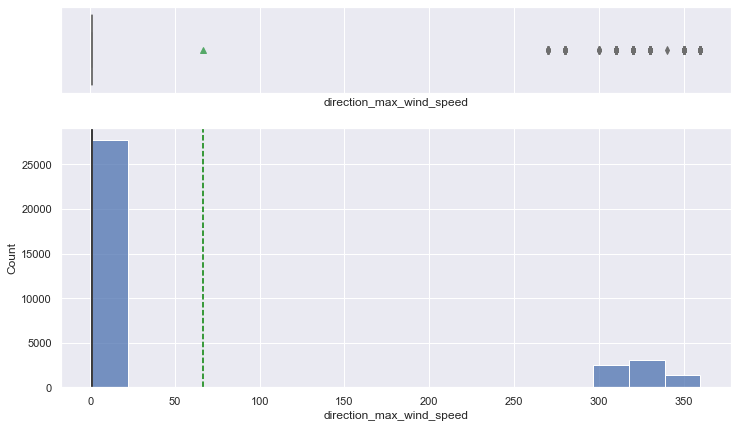

In [66]:
histogram_boxplot(df1, "direction_max_wind_speed")

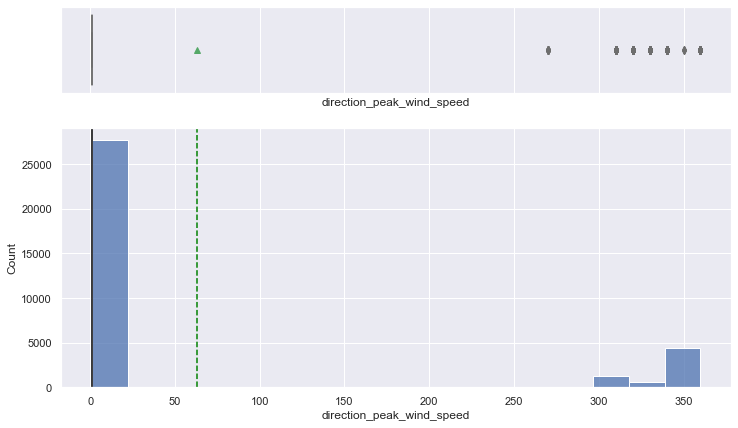

In [67]:
histogram_boxplot(df1, "direction_peak_wind_speed")

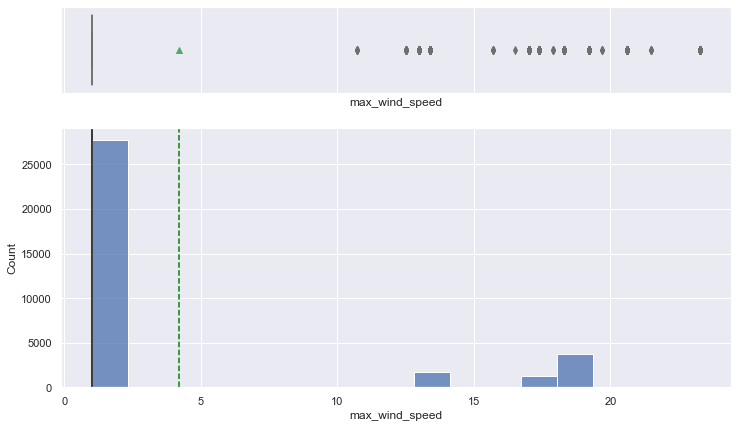

In [68]:
histogram_boxplot(df1, "max_wind_speed")

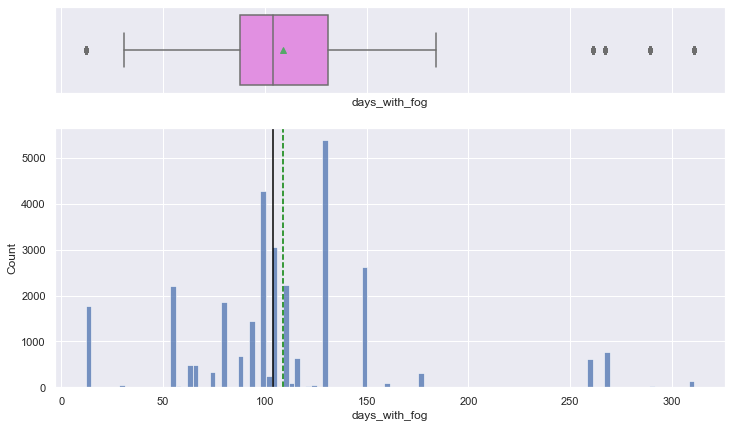

In [69]:
histogram_boxplot(df1, "days_with_fog")

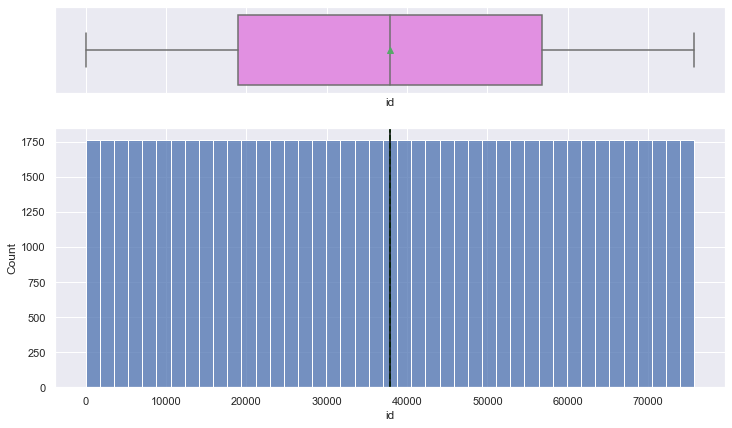

In [70]:
histogram_boxplot(df1, "id")

* Observation*

- There are many outliers
- Most of the variables are skewed to both the left and the right.

In [71]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

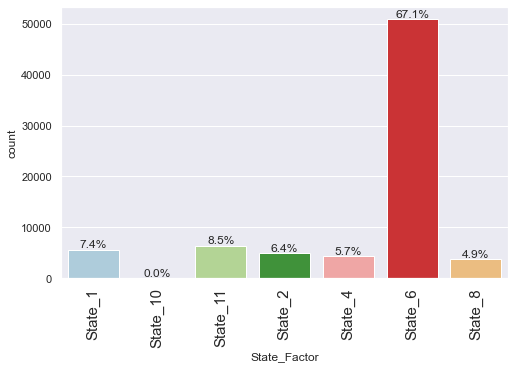

In [73]:
labeled_barplot(df1, "State_Factor", perc=True)

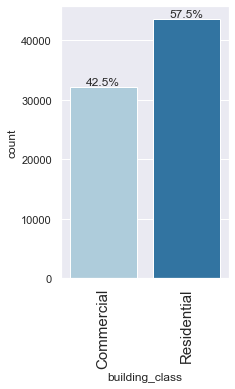

In [74]:
labeled_barplot(df1, "building_class", perc=True)

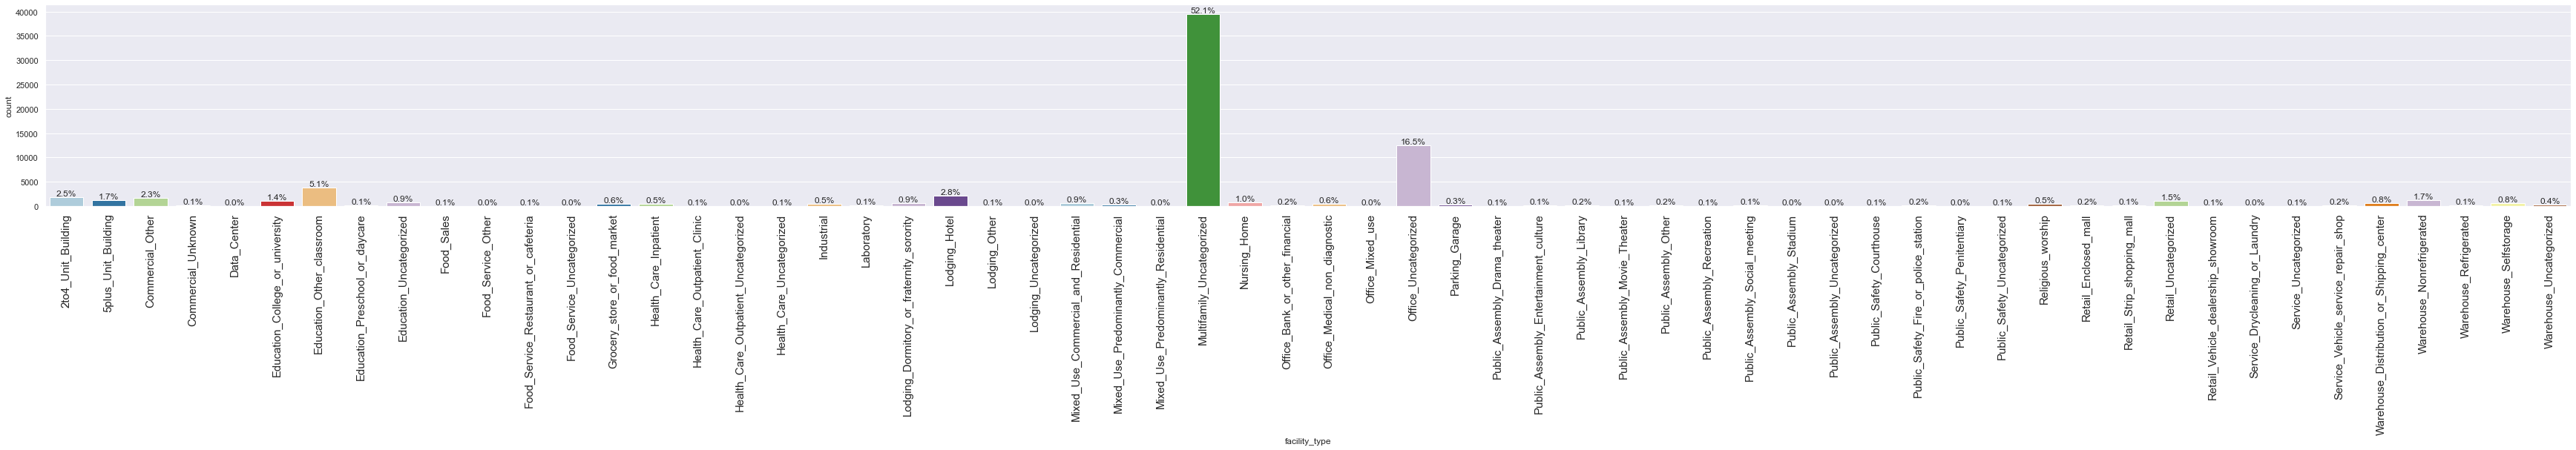

In [77]:
labeled_barplot(df1, "facility_type", perc=True)

*Observation*

- State_6 has the maximum count of 67.1%
- Residential building class type has the maximum count of 57.5%
- Multifamily_uncategorised has the maximum facility type percentage of 52.1

## Bivariate Analysis

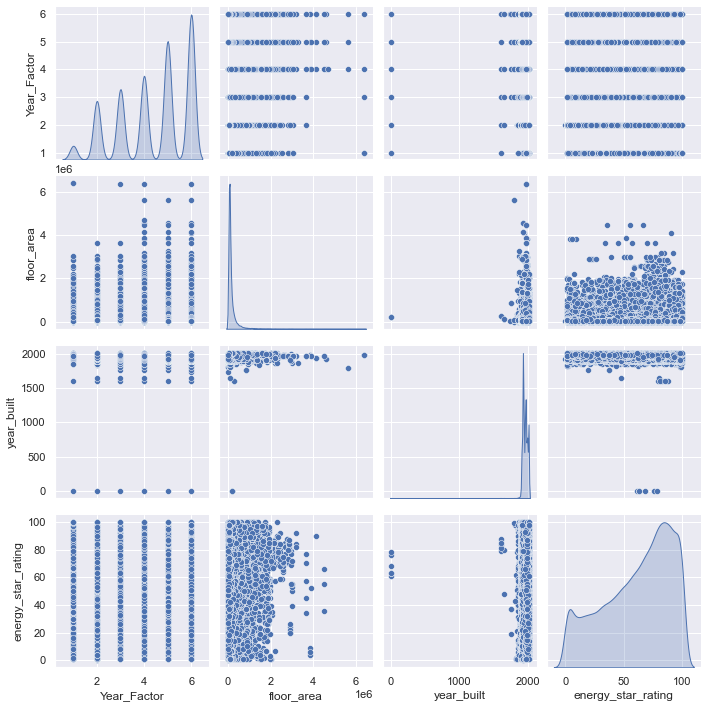

In [6]:
df1_attr = df1.iloc[:, 0:7]
sns.pairplot(df1_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

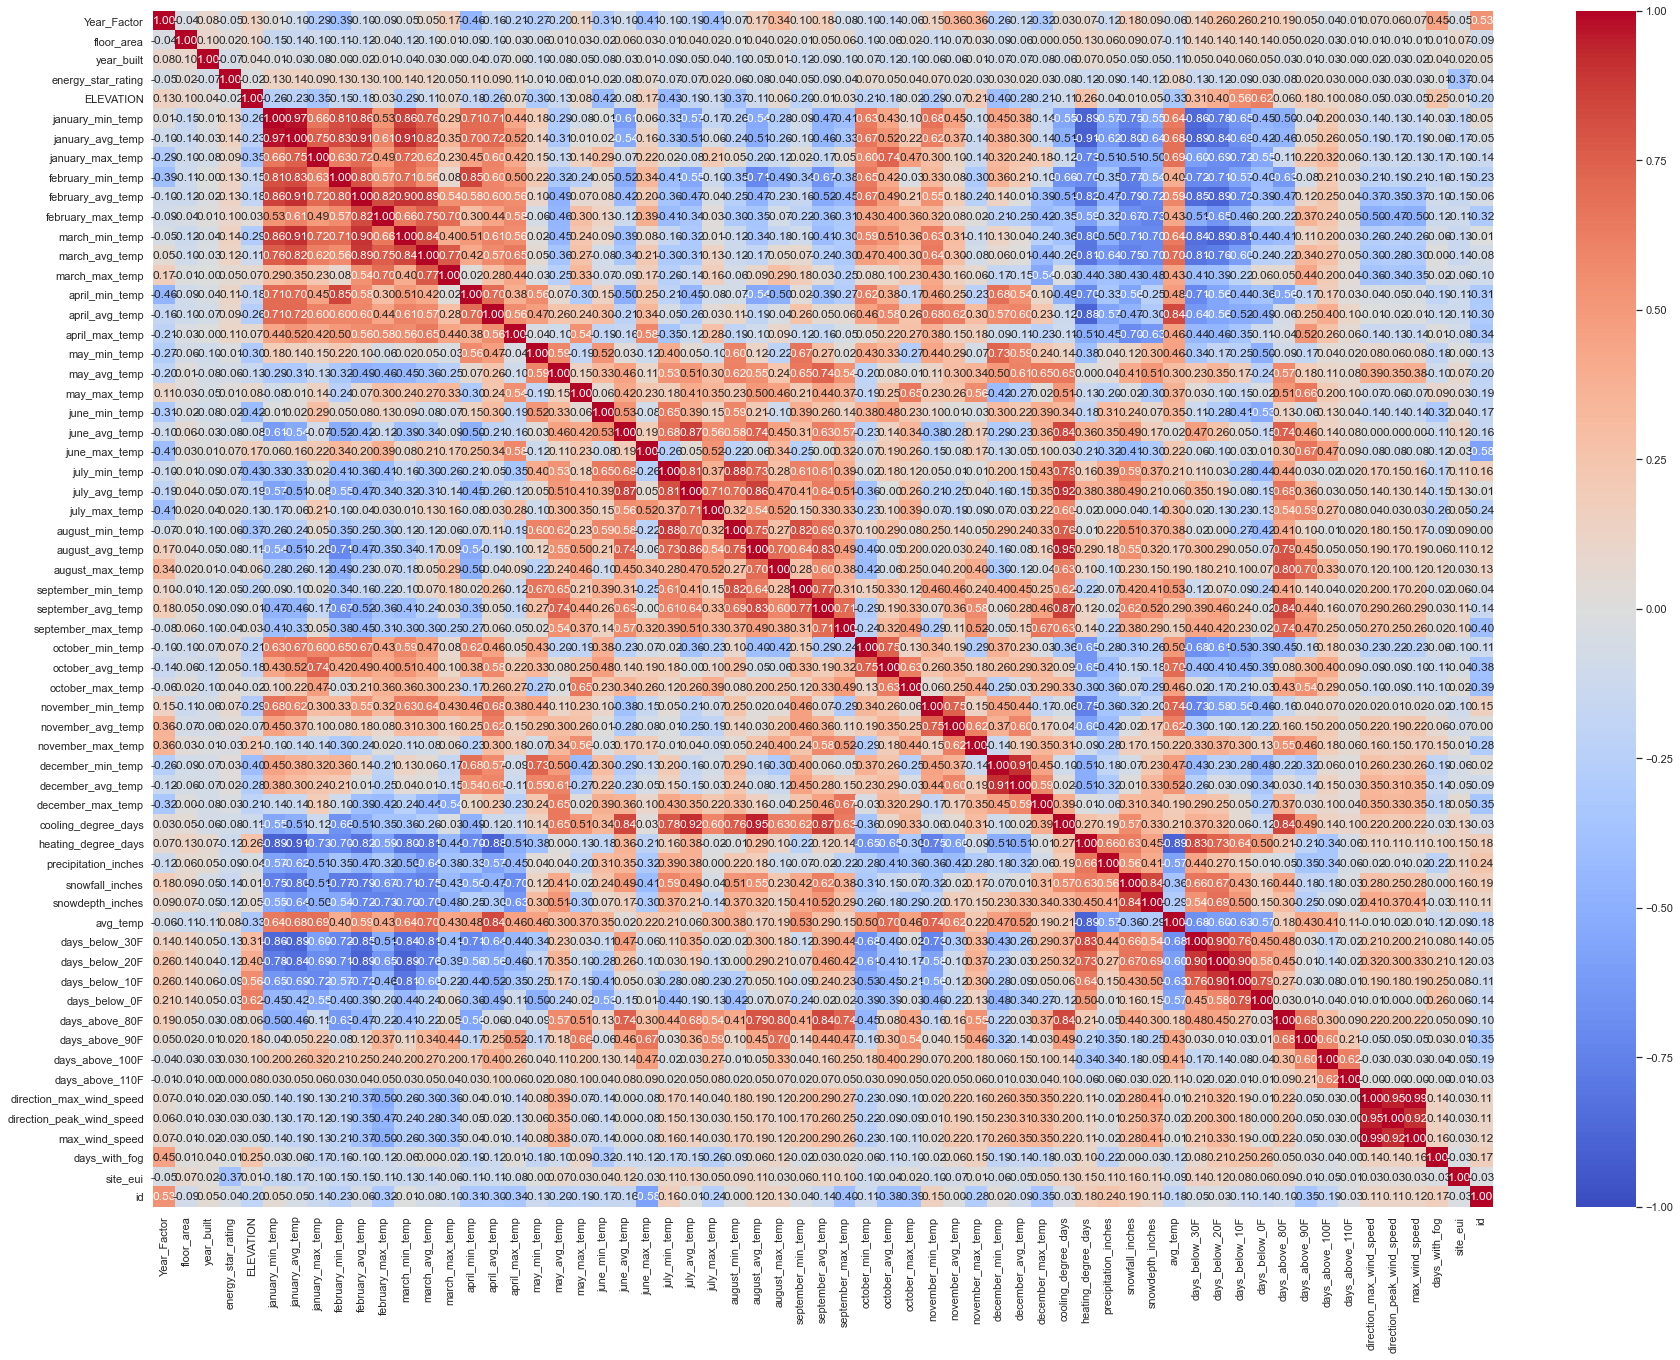

In [7]:
# Check for correlation among numerical variables
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(30, 22))
sns.heatmap(
    df1[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm",
)
plt.show()

*Observation*
- february_avg_temp and february_max_temp are positively correllated to direction_max_wind_speed, direction_peak_wind_speed,and max_wind_speed

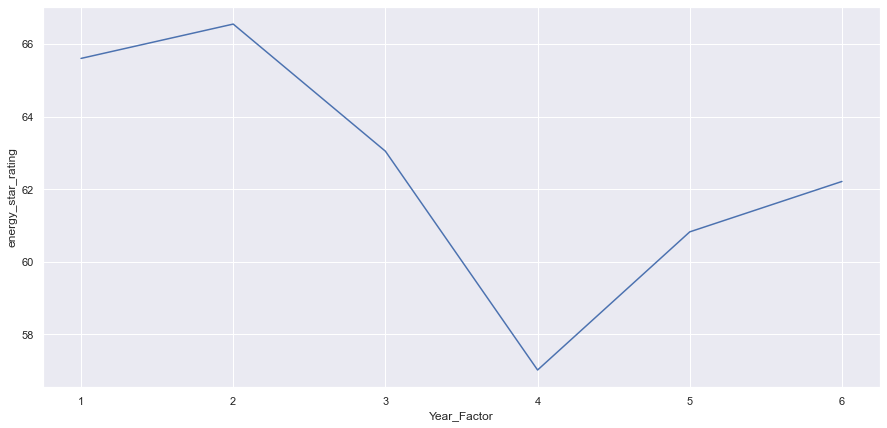

In [86]:
# average used_price over the release_years
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year_Factor", y="energy_star_rating", data=df1, ci=None)
plt.show()

*Observation*
- The weather and energy usage factors were observed most in year 2as it has a peak energy star rating of 66

# 4. Feature Engineering

We can always do more, but for now we'll reduce the dimensionality by a lot by replacing many of the columns with summaries of them instead. If these summaries capture most of the meaningful information in those columns then this is a good way to make a dataset more manageable.

### Outlier Detection

- checking for outliers in every numerical column

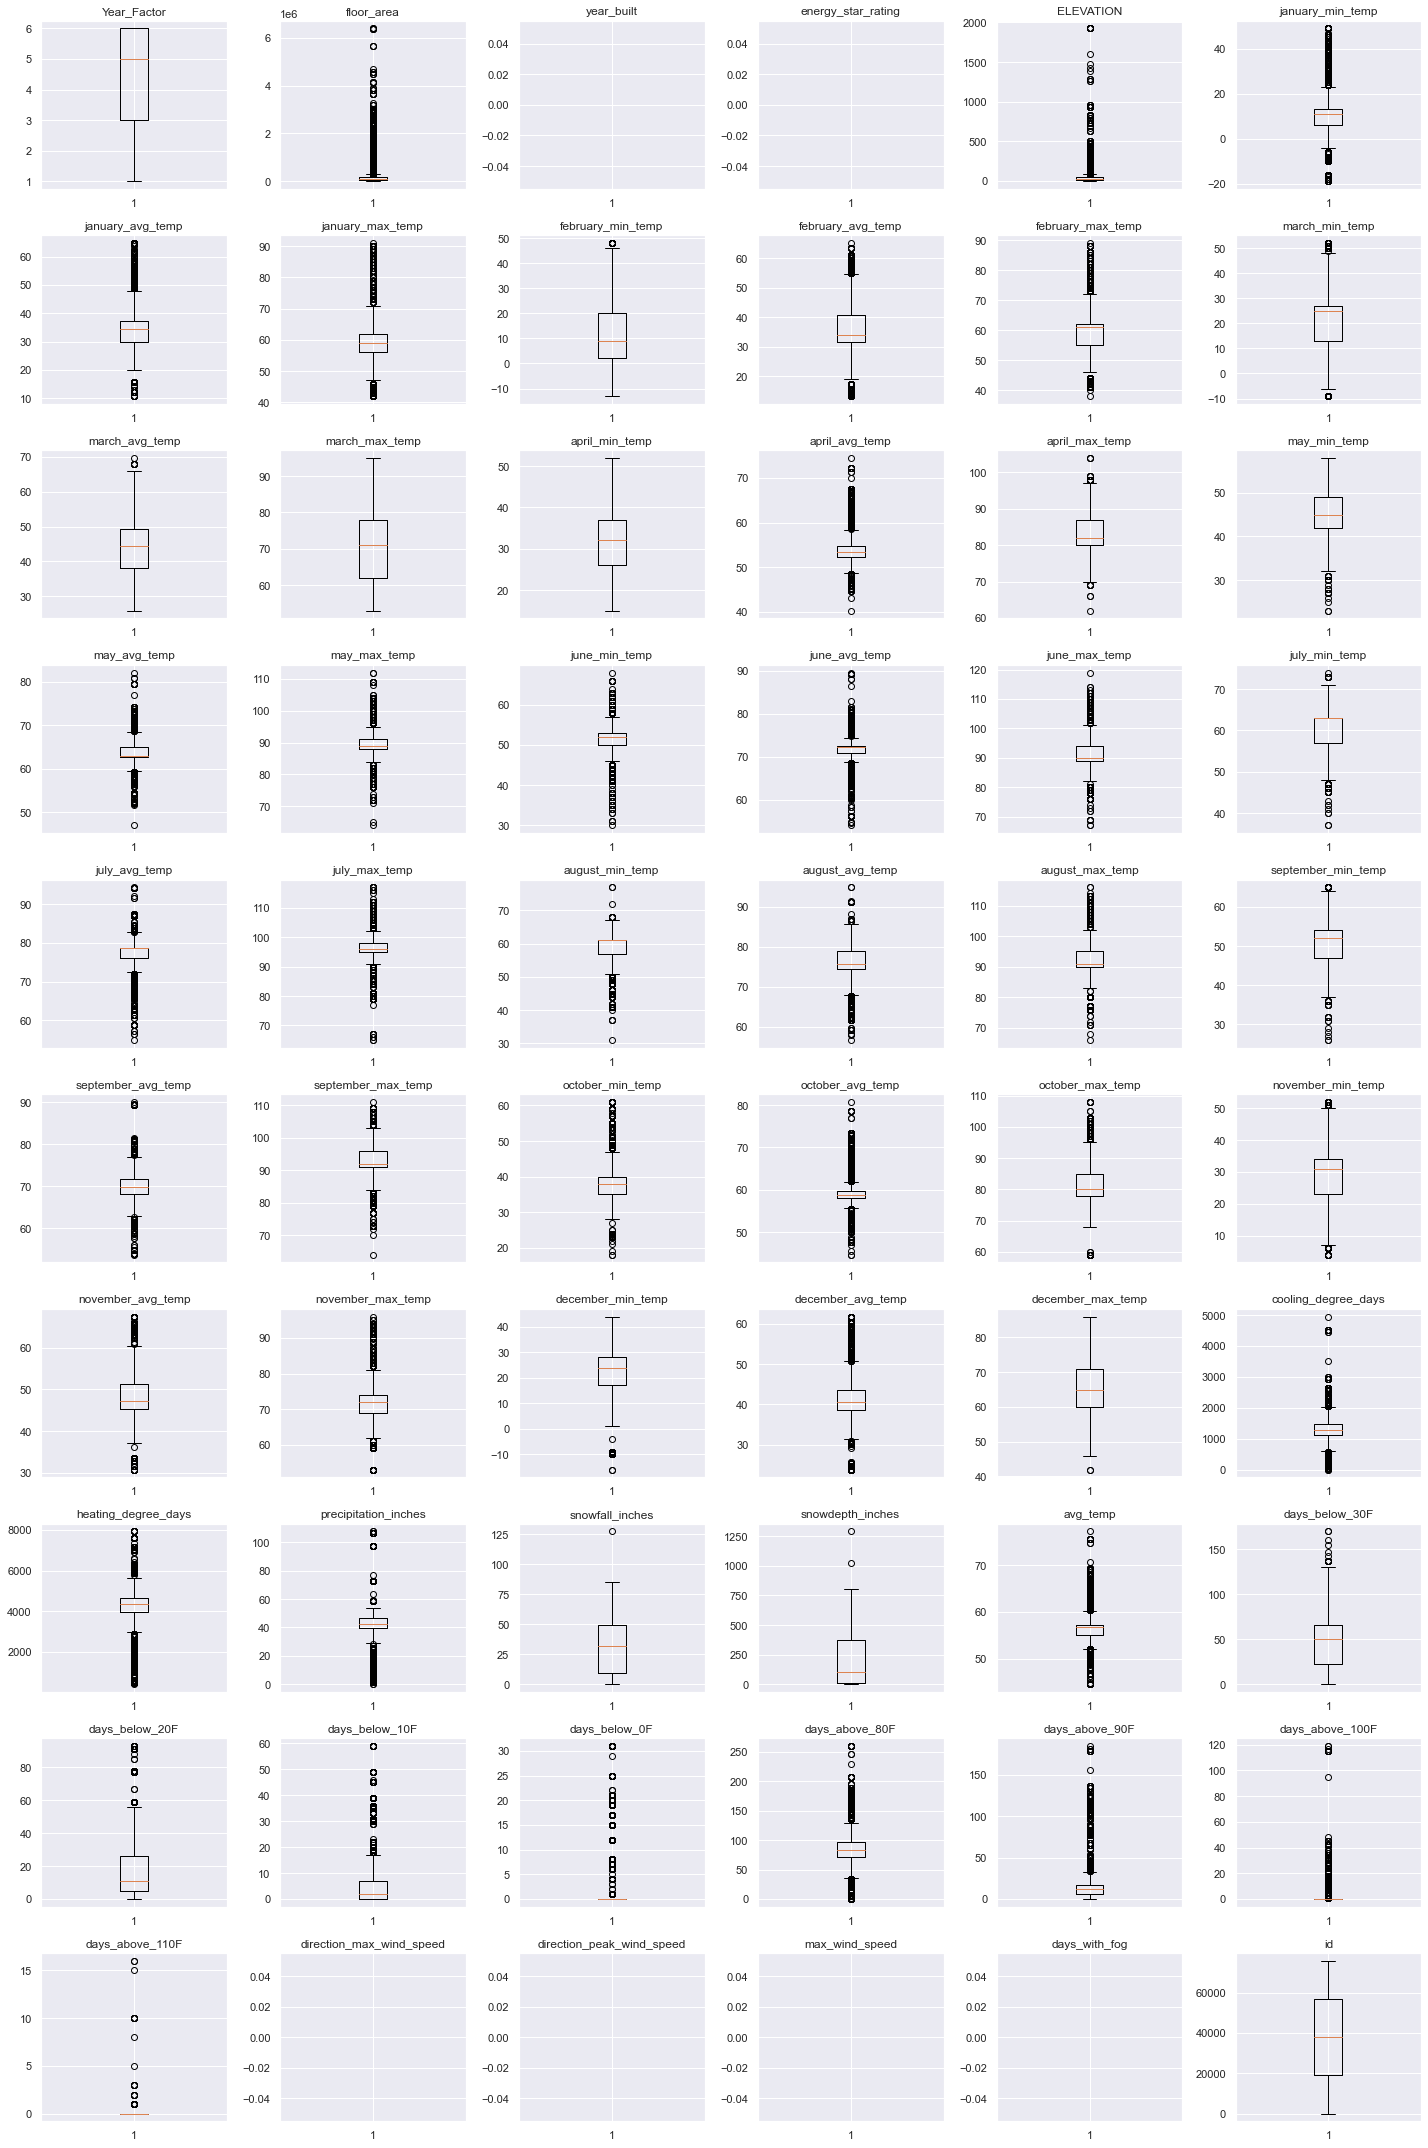

In [13]:
# Plotting the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 6, i + 1)
    plt.boxplot(Train_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*Observations*

- There are no outliers in Year_Factor, march_max_temp, and april_min_temp
- All other numeric columns have outliers either upper and lower or upper outliers
- I will treat these outliers as these might adversely affect the predictive power of linear model. 

### Outlier Treatment

In [6]:
def treat_outliers(df1, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df1: dataframe
    col: name of the column
    """
    Q1 = df1[col].quantile(0.25)  # 25th quantile
    Q3 = df1[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df1[col] = np.clip(df1[col], Lower_Whisker, Upper_Whisker)

    return df1


def treat_outliers_all(df1, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df1 = treat_outliers(df1, c)

    return df1

In [7]:
# treating the outliers
numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
df1 = treat_outliers_all(df1, numerical_col)

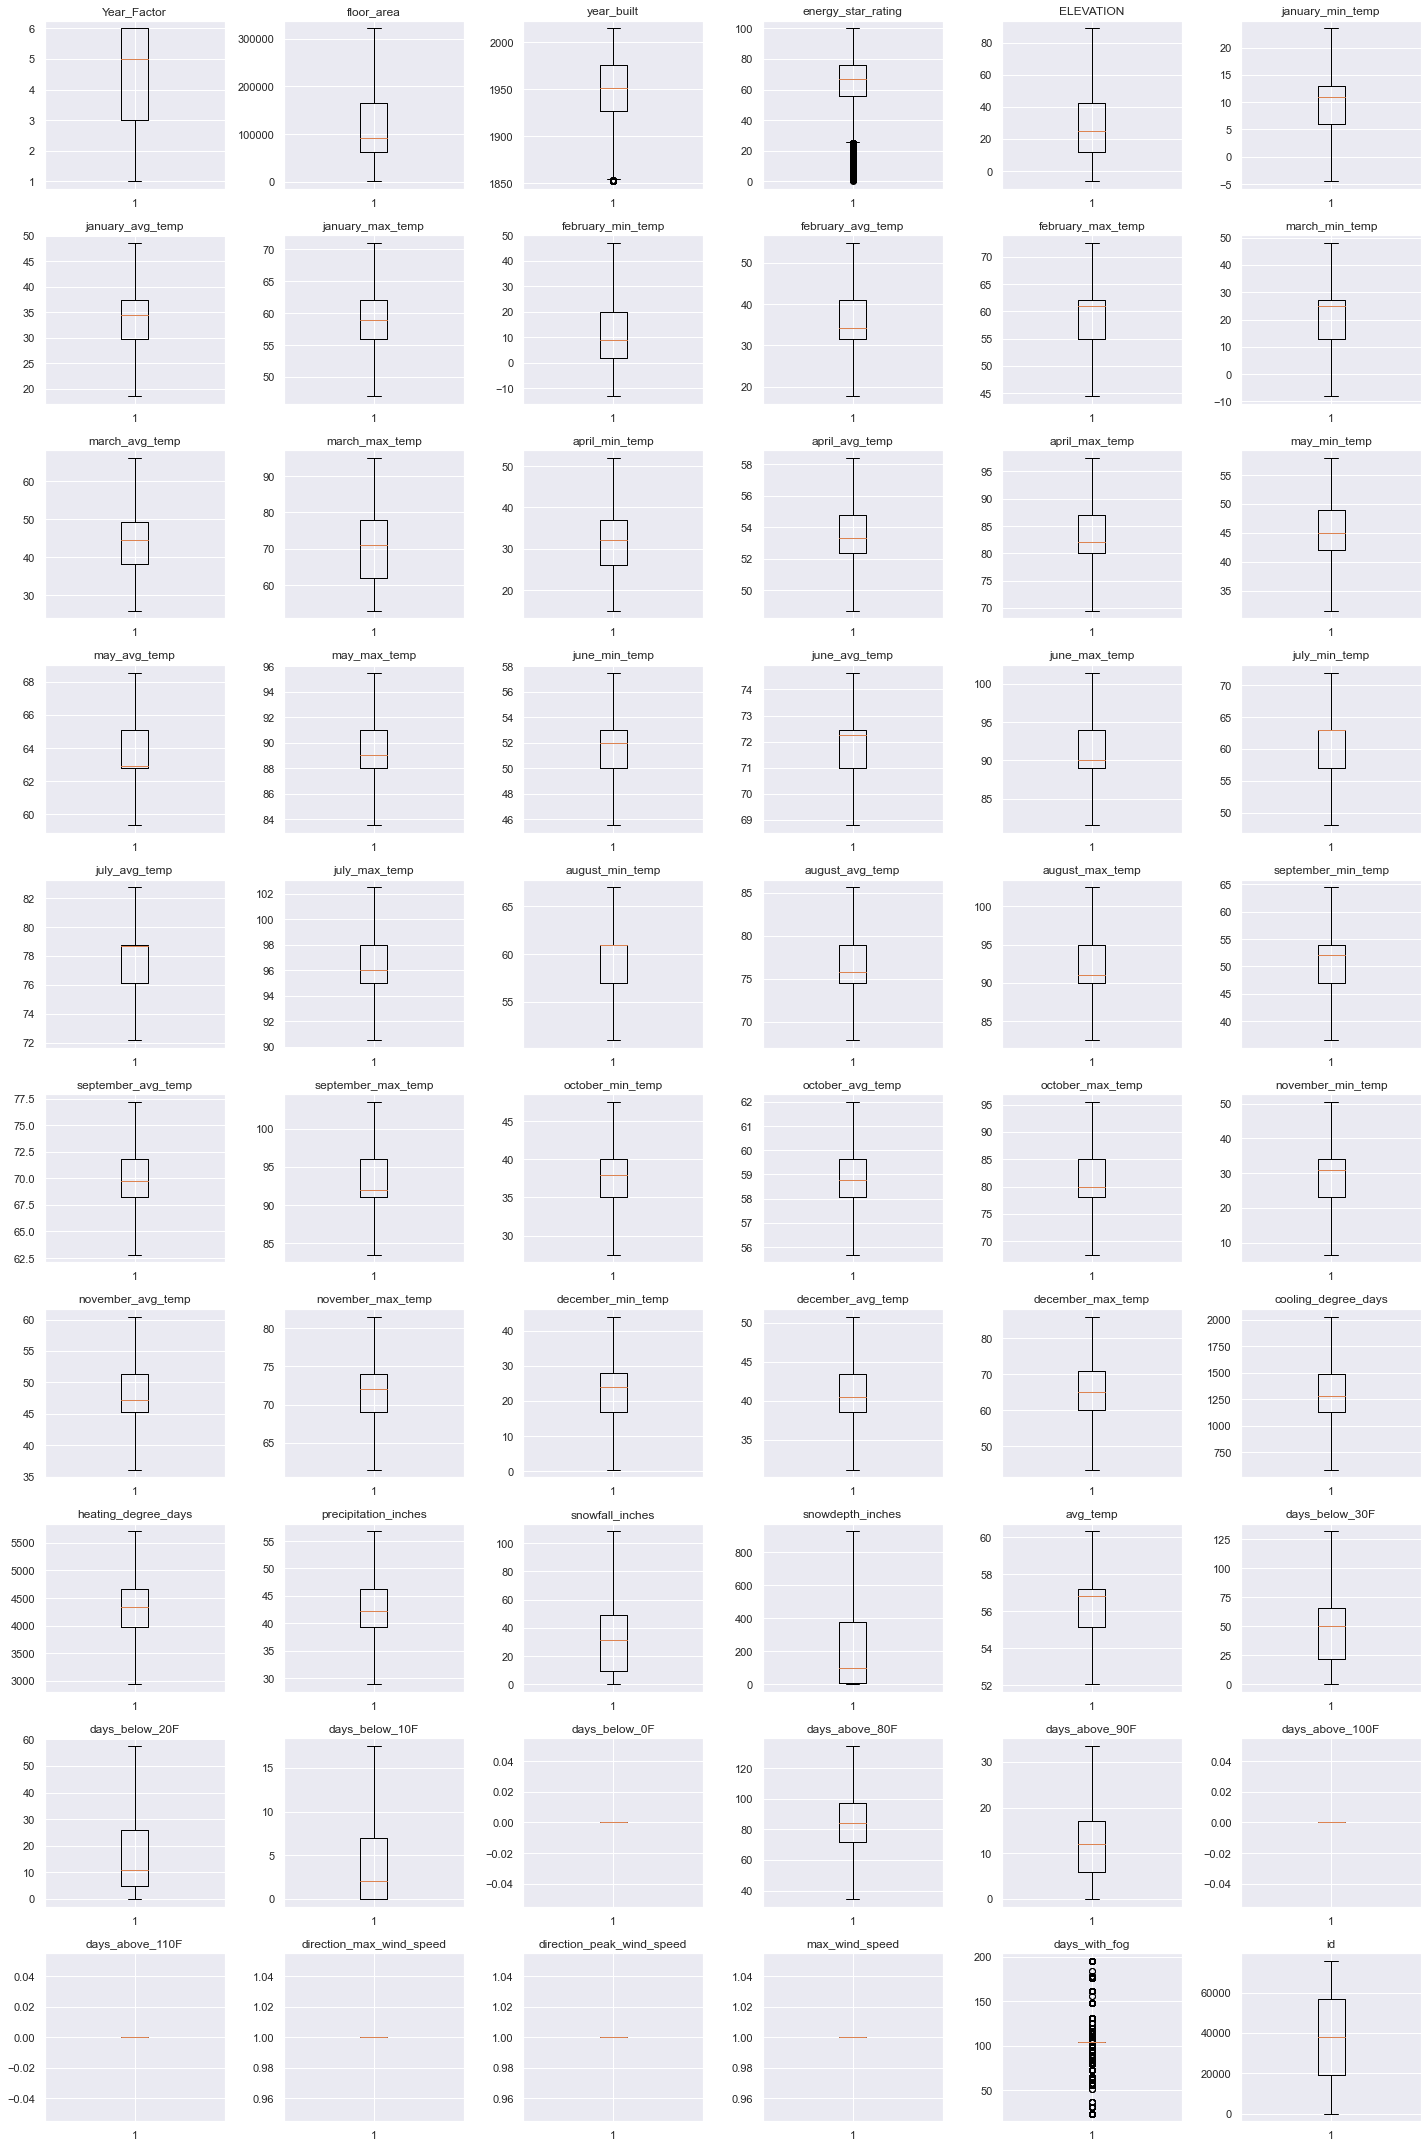

In [14]:
# Checking the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(10, 6, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**
* Outliers treated.

In [29]:
summaryname_to_cols = {
    'January': ['january_min_temp','january_avg_temp','january_max_temp'],
    'February': ['february_min_temp','february_avg_temp','february_max_temp'],
    'March': ['march_min_temp','march_avg_temp','march_max_temp'],
    'April': ['april_min_temp','april_avg_temp','april_max_temp'],
    'May': ['may_min_temp','may_avg_temp','may_max_temp'],
    'June': ['june_min_temp','june_avg_temp','june_max_temp'],
    'July': ['july_min_temp','july_avg_temp','july_max_temp'],
    'August': ['august_min_temp','august_avg_temp','august_max_temp'],
    'September': ['september_min_temp','september_avg_temp','september_max_temp'],
    'October': ['october_min_temp','october_avg_temp','october_max_temp'],
    'November': ['november_min_temp','november_avg_temp','november_max_temp'],
    'December': ['december_min_temp','december_avg_temp','december_max_temp'],
    'Days_Below': ['days_below_30F','days_below_20F','days_below_10F','days_below_0F'],
    'Days_Above': ['days_above_80F','days_above_90F','days_above_100F','days_above_110F']
    
    
}

for summarycol, colvec in summaryname_to_cols.items():
    dftrain[summarycol] = round(dftrain[colvec].mean(axis=1))
    
# now I don't have a vector that contains all of these old columns in one so I need to make it
# this is a "nested list comprehension" and is a common way to flatten a list of lists,
# which is what summaryname_to_cols.values() effectively is, so that the result is a 
# single list. The syntax says to loop colvec through each element of summaryname_to_cols.values(),
# and then within each iteration of that loop we loop colname through colvec and we simply
# keep colvec without doing anything else to it.
cols_to_drop = [colname for colvec in summaryname_to_cols.values() for colname in colvec]
dftrain.drop(cols_to_drop, axis=1, inplace=True)
print(dftrain.shape)  # big reduction in size. Getting much more manageable
dftrain.head(2)

(75757, 34)


Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market   61242.000    1942.000   
1  Warehouse_Distribution_or_Shipping_center  274000.000    1955.000   

   energy_star_rating  ELEVATION  cooling_degree_days  heating_degree_days  \
0              11.000      2.400                  115                 2960   
1              45.000      1.800                  115                 2960   

   ...    May   June   July  August  September  October  November  December  \
0  ... 62.000 67.000 66.000  66.000     69.000   64.000    56.000    52.000   
1  ... 62.000 67.000 66.000  66.000     69.000   64.000    56.000    52.000   

   Days_Below  Days_Above  
0       0.000       4.000  
1       0.000       4.000  

[2 rows x 34 columns]

*Observation*

- Dimensionality has been reduced from 64 columns to 34 columns

In [17]:
# We need to look at the statistical summary of the data in order to know how to prepare the data for whatever comes next.
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers rounded off to 3 decimal places

df1.describe(include="all").T

count unique                        top   freq  \
Year_Factor               75757.000    NaN                        NaN    NaN   
State_Factor                  75757      7                    State_6  50840   
building_class                75757      2                Residential  43558   
facility_type                 75757     60  Multifamily_Uncategorized  39455   
floor_area                75757.000    NaN                        NaN    NaN   
year_built                75757.000    NaN                        NaN    NaN   
energy_star_rating        75757.000    NaN                        NaN    NaN   
ELEVATION                 75757.000    NaN                        NaN    NaN   
cooling_degree_days       75757.000    NaN                        NaN    NaN   
heating_degree_days       75757.000    NaN                        NaN    NaN   
precipitation_inches      75757.000    NaN                        NaN    NaN   
snowfall_inches           75757.000    NaN                        NaN    NaN   
snowdepth_inches          75757.000    NaN                        NaN    NaN   
avg_temp                  75757.000    NaN                        NaN    NaN   
direction_max_wind_speed  75757.000    NaN                        NaN    NaN   
direction_peak_wind_speed 75757.000    NaN                        NaN    NaN   
max_wind_speed            75757.000    NaN                        NaN    NaN   
days_with_fog             75757.000    NaN                        NaN    NaN   
site_eui                  75757.000    NaN                        NaN    NaN   
id                        75757.000    NaN                        NaN    NaN   
January                   75757.000    NaN                        NaN    NaN   
February                  75757.000    NaN                        NaN    NaN   
March                     75757.000    NaN                        NaN    NaN   
April                     75757.000    NaN                        NaN    NaN   
May                       75757.000    NaN                        NaN    NaN   
June                      75757.000    NaN                        NaN    NaN   
July                      75757.000    NaN                        NaN    NaN   
August                    75757.000    NaN                        NaN    NaN   
September                 75757.000    NaN                        NaN    NaN   
October                   75757.000    NaN                        NaN    NaN   
November                  75757.000    NaN                        NaN    NaN   
December                  75757.000    NaN                        NaN    NaN   
Days_Below                75757.000    NaN                        NaN    NaN   
Days_Above                75757.000    NaN                        NaN    NaN   

                                mean        std     min       25%       50%  \
Year_Factor                    4.368      1.471   1.000     3.000     5.000   
State_Factor                     NaN        NaN     NaN       NaN       NaN   
building_class                   NaN        NaN     NaN       NaN       NaN   
facility_type                    NaN        NaN     NaN       NaN       NaN   
floor_area                165983.866 246875.791 943.000 62379.000 91367.000   
year_built                  1952.275     36.602   0.000  1927.000  1951.000   
energy_star_rating            63.147     23.238   0.000    56.000    67.000   
ELEVATION                     39.506     60.657  -6.400    11.900    25.000   
cooling_degree_days         1202.250    391.562   0.000  1128.000  1277.000   
heating_degree_days         4324.957    824.367 398.000  3978.000  4337.000   
precipitation_inches          42.431     10.592   0.000    39.350    42.170   
snowfall_inches               29.136     17.811   0.000     9.600    31.600   
snowdepth_inches             164.862    175.276   0.000    10.000   101.000   
avg_temp                      56.177      2.242  44.512    55.148    56.836   
direction_max_wind_speed      31.004     94.

In [17]:
# building our linear model
# independant variables
X = dftrain.drop(["site_eui"], axis=1)
# the dependent variable
y = dftrain["site_eui"]# Split X and y into training and test set in 70:30 ratio

In [20]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0            1     61242.0      1942.0                11.0        2.4   
1            1    274000.0      1955.0                45.0        1.8   
2            1    280025.0      1951.0                97.0        1.8   
3            1     55325.0      1980.0                46.0        1.8   
4            1     66000.0      1985.0               100.0        2.4   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0                36              50.5                68                 35   
1                36              50.5                68                 35   
2                36              50.5                68                 35   
3                36              50.5                68                 35   
4                36              50.5                68                 35   

   february_avg_temp  ...  facility_type_Retail_Uncategorized  \
0          50.589286  ...                                   0   
1          50.589286  ...                                   0   
2          50.589286  ...                                   0   
3          50.589286  ...                                   0   
4          50.589286  ...                                   0   

   facility_type_Retail_Vehicle_dealership_showroom  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   facility_type_Service_Drycleaning_or_Laundry  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   facility_type_Service_Uncategorized  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   facility_type_Service_Vehicle_service_repair_shop  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   facility_type_Warehouse_Distribution_or_Shipping_center  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  0         
4                                                  0         

   facility_type_Warehouse_Nonrefrigerated  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   

   facility_type_Warehouse_Refrigerated  facility_type_Warehouse_Selfstorage  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   facility_type_Warehouse_Uncategorized  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 126 columns]

In [21]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Model Building (sklearn)

In [22]:
# intialize the model to be fit and fit the model on the train data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Linear Model Building

1. Predict the Site EUI for each row. each row

2.  Encode categorical features.

3. Split the data into train and test to be able to evaluate the model that we build on the train data.

4. Build a Linear Regression model using the train data and then check it's performance.

In [23]:
# defining X and y variables
X = df1.drop(["site_eui"], axis=1)
y = df1["site_eui"]

print(X.head())
print(y.head())

   Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36         

In [24]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0            1     61242.0      1942.0                11.0        2.4   
1            1    274000.0      1955.0                45.0        1.8   
2            1    280025.0      1951.0                97.0        1.8   
3            1     55325.0      1980.0                46.0        1.8   
4            1     66000.0      1985.0               100.0        2.4   

   january_min_temp  january_avg_temp  january_max_temp  february_min_temp  \
0                36              50.5                68                 35   
1                36              50.5                68                 35   
2                36              50.5                68                 35   
3                36              50.5                68                 35   
4                36              50.5                68                 35   

   february_avg_temp  ...  facility_type_Retail_Uncategorized  \
0          50.589286  ...                                   0   
1          50.589286  ...                                   0   
2          50.589286  ...                                   0   
3          50.589286  ...                                   0   
4          50.589286  ...                                   0   

   facility_type_Retail_Vehicle_dealership_showroom  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   facility_type_Service_Drycleaning_or_Laundry  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   facility_type_Service_Uncategorized  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   facility_type_Service_Vehicle_service_repair_shop  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   facility_type_Warehouse_Distribution_or_Shipping_center  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  0         
4                                                  0         

   facility_type_Warehouse_Nonrefrigerated  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        1   

   facility_type_Warehouse_Refrigerated  facility_type_Warehouse_Selfstorage  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   facility_type_Warehouse_Uncategorized  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 126 columns]

In [25]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [26]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 53029
Number of rows in test data = 22728


## Linear Regression using statsmodels

- Building the linear regression model using statsmodels.

In [14]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:               site_eui   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     243.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:27:05   Log-Likelihood:            -2.7844e+05
No. Observations:               53029   AIC:                         5.571e+05
Df Residuals:                   52903   BIC:                         5.583e+05
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

**Observations**

- Negative values of the coefficient show that *site_eui* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *site_eui* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.


## Checking Linear Regression Assumptions:



1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [16]:
checking_vif(x_train1)


C:\Users\BETTY\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\BETTY\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature         VIF
0                                                const    0.000000
1                                          Year_Factor  288.395065
2                                           floor_area    1.181011
3                                           year_built    1.105317
4                                   energy_star_rating    1.087115
..                                                 ...         ...
122  facility_type_Warehouse_Distribution_or_Shippi...         inf
123            facility_type_Warehouse_Nonrefrigerated         inf
124               facility_type_Warehouse_Refrigerated         inf
125                facility_type_Warehouse_Selfstorage         inf
126              facility_type_Warehouse_Uncategorized         inf

[127 rows x 2 columns]